In [14]:
import pandas as pd
import os

base_output_dir_FT = '/home/michele.maggini/XAI_HIPP/IG/results_FT'
base_output_dir_no_FT = '/home/michele.maggini/XAI_HIPP/IG/results_pretrained'
base_output_dir_FT_EMB_top = "/home/michele.maggini/CT_3results_FT_EMB_ARCH_new_Thresholds"
df_FT = pd.read_csv(os.path.join(base_output_dir_FT, 'combined_attribution_results.csv'))
df_no_FT = pd.read_csv(os.path.join(base_output_dir_no_FT, 'combined_attribution_results.csv'))
df_FT_EMB_top = pd.read_csv(os.path.join(base_output_dir_FT_EMB_top, 'combined_attribution_results.csv')) 

In [3]:
print("DF_FT models:", df_FT['model'].unique(), "DF_no_FT models:", df_no_FT['model'].unique(), "DF_FT_EMB_top models:", df_FT_EMB_top['model'].unique())

DF_FT models: ['bert-ita' 'bert-ita-xxl' 'multi' 'sent-ita' 'sent-ita-xxl'] DF_no_FT models: ['nickprock/sentence-bert-base-italian-uncased'
 'google-bert/bert-base-multilingual-uncased'
 'dbmdz/bert-base-italian-uncased' 'dbmdz/bert-base-italian-xxl-uncased'
 'nickprock/sentence-bert-base-italian-xxl-uncased'] DF_FT_EMB_top models: ['arch-bert-ita-xxl' 'arch-sent-ita-xxl' 'arch-multi' 'arch-bert-ita'
 'arch-sent-ita']


Loading FT data...
Loaded combined results from /home/michele.maggini/CT_3results_FT_newThresholds: 6809 rows
Models in data: ['bert-ita', 'bert-ita-xxl', 'multi', 'sent-ita', 'sent-ita-xxl']
Traits in data: ['Epithet', 'Figurative_Speech', 'Hyperbolic_Language', 'Irony/Sarcasm', 'Loaded_language', 'Neologism']
Threshold results loaded as <class 'dict'> for /home/michele.maggini/CT_3results_FT_newThresholds
Loaded threshold results from /home/michele.maggini/CT_3results_FT_newThresholds
Loading noFT data...
Loaded combined results from /home/michele.maggini/CT_3results_pretrained_newThresholds: 7060 rows
Models in data: ['bert-base-italian-uncased', 'bert-base-italian-xxl-uncased', 'bert-base-multilingual-cased', 'sentence-bert-base-italian-uncased', 'sentence-bert-base-italian-xxl-uncased']
Traits in data: ['Epithet', 'Figurative_Speech', 'Hyperbolic_Language', 'Irony/Sarcasm', 'Loaded_language', 'Neologism']
Threshold results loaded as <class 'dict'> for /home/michele.maggini/CT_3res

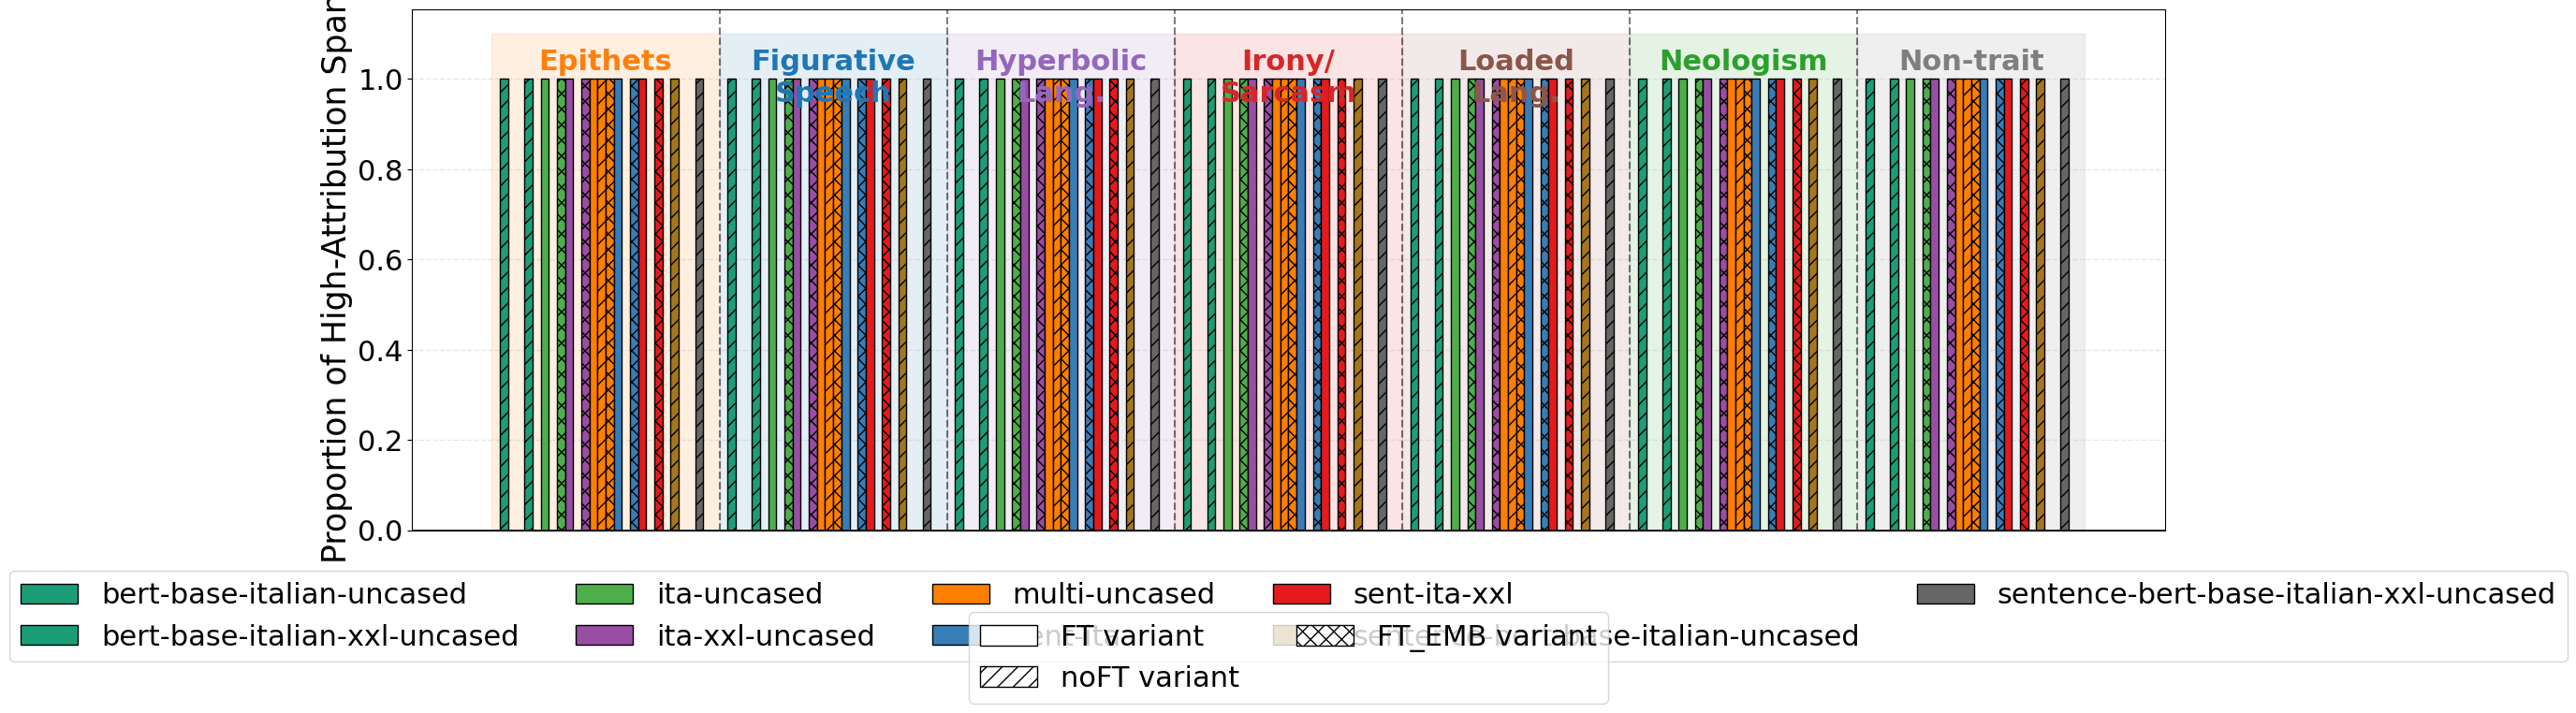

Comparison plot created successfully!
Comparison analysis completed!

Data summary:
model                                   variant
bert-base-italian-uncased               noFT       1.0
bert-base-italian-xxl-uncased           noFT       1.0
ita-uncased                             FT         1.0
                                        FT_EMB     1.0
ita-xxl-uncased                         FT         1.0
                                        FT_EMB     1.0
multi-uncased                           FT         1.0
                                        FT_EMB     1.0
                                        noFT       1.0
sent-ita                                FT         1.0
                                        FT_EMB     1.0
sent-ita-xxl                            FT         1.0
                                        FT_EMB     1.0
sentence-bert-base-italian-uncased      noFT       1.0
sentence-bert-base-italian-xxl-uncased  noFT       1.0
Name: proportion, dtype: float64


In [20]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch, Rectangle
import json
from collections import defaultdict

base_output_dir_FT = '/home/michele.maggini/CT_3results_FT_newThresholds'
base_output_dir_no_FT = '/home/michele.maggini/CT_3results_pretrained_newThresholds'
base_output_dir_FT_EMB_top = "/home/michele.maggini/CT_3results_FT_EMB_ARCH_new_Thresholds"
base_output_dir = '/home/michele.maggini/IG_FINAL'

# Create output directory for comparison analysis
comparison_dir = os.path.join(base_output_dir, "comparison_analysis")
os.makedirs(comparison_dir, exist_ok=True)

# Define model name mapping - comprehensive mapping for all variants
model_name_mapping = {
    # Standard HuggingFace names (noFT)
    'nickprock/sentence-bert-base-italian-xxl-uncased': 'sent-ita-xxl',
    'nickprock/sentence-bert-base-italian-uncased': 'sent-ita',
    'dbmdz/bert-base-italian-uncased': 'ita-uncased',
    'dbmdz/bert-base-italian-xxl-uncased': 'ita-xxl-uncased',
    "google-bert/bert-base-multilingual-uncased": "multi-uncased",
    
    # HIPP variants (FT models) - exact matches
    'sent-ita-xxl': 'sent-ita-xxl',
    'sent-ita': 'sent-ita',
    'bert-ita': 'ita-uncased', 
    'bert-ita-xxl': 'ita-xxl-uncased',
    'multi': 'multi-uncased',

    # HIPP variants (FT_EMB models) - exact matches
    'arch-sent-ita-xxl': 'sent-ita-xxl',
    'arch-sent-ita': 'sent-ita',
    'arch-bert-ita': 'ita-uncased', 
    'arch-bert-ita-xxl': 'ita-xxl-uncased',
    'arch-multi-reft': 'multi-uncased'
}

# Define custom model colors (using normalized names as keys)
model_color_map = {
    'sent-ita-xxl': '#e41a1c',      # Red
    'sent-ita': '#377eb8',          # Blue
    'ita-uncased': '#4daf4a',       # Green
    'ita-xxl-uncased': '#984ea3',   # Purple
    'multi-uncased': '#ff7f00',     # Orange
}

# Define trait colors (consistent with previous plot)
trait_colors = {
    'Figurative_Speech': '#1f77b4',          # Blue
    'Epithet': '#ff7f0e',                    # Orange  
    'Neologism': '#2ca02c',                  # Green
    'Irony/Sarcasm': '#d62728',              # Red
    'Hyperbolic_Language': '#9467bd',        # Purple
    'Loaded_language': '#8c564b',            # Brown
    'non-trait': '#7f7f7f'                   # Gray for non-trait
}

# Feature name mapping for display
feature_name_mapping = {
    'Figurative_Speech': 'Figurative\nSpeech',
    'Epithet': 'Epithets',
    'Neologism': 'Neologism',
    'Irony/Sarcasm': 'Irony/\nSarcasm',
    'Hyperbolic_Language': 'Hyperbolic\nLang.',
    'Loaded_language': 'Loaded\nLang.',
    'non-trait': 'Non-trait'
}

# Hatches for FT, noFT, and FT_EMB
hatches = {'FT': '', 'noFT': '//', 'FT_EMB': 'xx'}

def load_and_process_data(base_dir):
    """Load and process data from a given directory"""
    combined_csv_path = os.path.join(base_dir, "combined_attribution_results.csv")
    threshold_json_path = os.path.join(base_dir, "percentile_results.json")
    
    if not os.path.exists(combined_csv_path):
        print(f"Combined results not found: {combined_csv_path}")
        return None, None
    if not os.path.exists(threshold_json_path):
        print(f"Threshold results not found: {threshold_json_path}")
        return None, None
    
    try:
        # Load combined results
        combined_results = pd.read_csv(combined_csv_path)
        print(f"Loaded combined results from {base_dir}: {len(combined_results)} rows")
        print(f"Models in data: {sorted(combined_results['model'].unique())}")
        print(f"Traits in data: {sorted(combined_results['trait'].unique())}")
        
        # Load threshold results
        with open(threshold_json_path, 'r') as f:
            threshold_results = json.load(f)
        
        models = sorted(combined_results['model'].unique())
        
        # Handle if it's a list (possible generation artifact)
        if isinstance(threshold_results, list):
            print(f"Threshold results loaded as list for {base_dir}, length: {len(threshold_results)}")
            if len(threshold_results) == len(models):
                combined_threshold = {}
                for model, res in zip(models, threshold_results):
                    for perc in res:
                        if perc not in combined_threshold:
                            combined_threshold[perc] = {}
                        combined_threshold[perc][model] = res[perc]
                threshold_results = combined_threshold
            else:
                print(f"Warning: List length {len(threshold_results)} does not match models {len(models)}. Using as is.")
        else:
            print(f"Threshold results loaded as {type(threshold_results)} for {base_dir}")
        
        print(f"Loaded threshold results from {base_dir}")
        
        return combined_results, threshold_results
    except Exception as e:
        print(f"Error loading data from {base_dir}: {e}")
        return None, None

def normalize_model_name(model_name, variant):
    """Normalize model name to consistent unified short form for comparison.
    
    Args:
        model_name: Original model name
        variant: 'FT', 'noFT', or 'FT_EMB' to handle duplicates properly
    """
    model_clean = model_name.lower().replace('-', '').replace('_', '').replace('/', '')
    
    # More specific mapping that preserves all models
    mapping_patterns = {
        # --- FT models ---
        'bertita': 'ita-uncased',  # Only match exact 'bertita' (not bertitaxxl)
        'bertitaxxl': 'ita-xxl-uncased',
        '^multi$': 'multi-uncased',  # Only match exact 'multi'
        'sentita$': 'sent-ita',      # Only match exact 'sentita' (not sentitaxxl)
        'sentitaxxl': 'sent-ita-xxl',
        'multi': 'multi-uncased',

        # --- noFT models ---
        'dbmdzbertbaseitalianuncased$': 'ita-uncased',  # Only base, not xxl
        'dbmdzbertbaseitalianxxluncased': 'ita-xxl-uncased',
        'googlebertbertbasemultilingualuncased': 'multi-uncased',
        'nickprocksentencebertbaseitalianuncased$': 'sent-ita',  # Only base, not xxl
        'nickprocksentencebertbaseitalianxxluncased': 'sent-ita-xxl',

        # --- FT_EMB models ---
        'archbertita': 'ita-uncased',
        'archbertitaxxl': 'ita-xxl-uncased',
        'archmultireft': 'multi-uncased',
        'archsentita$': 'sent-ita',
        'archsentitaxxl': 'sent-ita-xxl',
    }

    # Special handling for FT models to avoid conflicts
    if variant == 'FT':
        if model_name == 'bert-ita':
            return 'ita-uncased'
        elif model_name == 'bert-ita-xxl':
            return 'ita-xxl-uncased'
        elif model_name == 'multi':
            return 'multi-uncased'
        elif model_name == 'sent-ita':
            return 'sent-ita'
        elif model_name == 'sent-ita-xxl':
            return 'sent-ita-xxl'
    
    if variant == 'FT_EMB':
        if model_name == 'arch-bert-ita':
            return 'ita-uncased'
        elif model_name == 'arch-bert-ita-xxl':
            return 'ita-xxl-uncased'
        elif model_name == 'arch-multi':
            return 'multi-uncased'
        elif model_name == 'arch-sent-ita':
            return 'sent-ita'
        elif model_name == 'arch-sent-ita-xxl':
            return 'sent-ita-xxl'
    
    # For noFT models, use pattern matching
    for pattern, normalized_name in mapping_patterns.items():
        if pattern.endswith('$'):
            # Exact match required
            clean_pattern = pattern.replace('$', '')
            if model_clean == clean_pattern:
                return normalized_name
        else:
            # Partial match
            if pattern in model_clean:
                return normalized_name

    print(f"⚠️ Warning: Could not normalize model name: {model_name} -> {model_clean}")
    return model_name

def create_comparison_plot(ft_data, noft_data, ft_emb_data, ratio_thresholds=[0]):
    """Create comparison plot showing FT, noFT, and FT_EMB variants for each model and trait"""
    
    if ft_data[0] is None or noft_data[0] is None or ft_emb_data[0] is None:
        print("Missing data, cannot create plot")
        return None
    
    # Get traits and models
    ft_traits = sorted(ft_data[0]["trait"].unique()) if not ft_data[0].empty else []
    noft_traits = sorted(noft_data[0]["trait"].unique()) if not noft_data[0].empty else []
    ft_emb_traits = sorted(ft_emb_data[0]["trait"].unique()) if not ft_emb_data[0].empty else []
    common_traits = sorted(set(ft_traits) & set(noft_traits) & set(ft_emb_traits))
    
    ft_models = sorted(ft_data[0]["model"].unique()) if not ft_data[0].empty else []
    noft_models = sorted(noft_data[0]["model"].unique()) if not noft_data[0].empty else []
    ft_emb_models = sorted(ft_emb_data[0]["model"].unique()) if not ft_emb_data[0].empty else []

    print(f"FT models (original): {ft_models}")
    print(f"noFT models (original): {noft_models}")
    print(f"FT_EMB models (original): {ft_emb_models}")
    
    # Normalize model names with variant information
    ft_models_normalized = [normalize_model_name(model, 'FT') for model in ft_models]
    noft_models_normalized = [normalize_model_name(model, 'noFT') for model in noft_models]
    ft_emb_models_normalized = [normalize_model_name(model, 'FT_EMB') for model in ft_emb_models]

    print(f"FT models (normalized): {ft_models_normalized}")
    print(f"noFT models (normalized): {noft_models_normalized}")
    print(f"FT_EMB models (normalized): {ft_emb_models_normalized}")

    # Get all unique normalized models
    all_models_normalized = sorted(set(ft_models_normalized + noft_models_normalized + ft_emb_models_normalized))
    print(f"All normalized models: {all_models_normalized}")
    
    if not all_models_normalized:
        print("No models found after normalization!")
        return None
    
    # Create mapping from normalized to original names
    ft_model_mapping = {}
    for orig, norm in zip(ft_models, ft_models_normalized):
        ft_model_mapping[norm] = orig
    
    noft_model_mapping = {}
    for orig, norm in zip(noft_models, noft_models_normalized):
        noft_model_mapping[norm] = orig

    ft_emb_model_mapping = {}
    for orig, norm in zip(ft_emb_models, ft_emb_models_normalized):
        ft_emb_model_mapping[norm] = orig
    
    print(f"FT mapping: {ft_model_mapping}")
    print(f"noFT mapping: {noft_model_mapping}")
    print(f"FT_EMB mapping: {ft_emb_model_mapping}")
    
    # Prepare combined data for plotting
    plot_data = []
    
    # Add FT data
    for trait in common_traits + ['non-trait']:
        for model_norm in all_models_normalized:
            if model_norm not in ft_model_mapping:
                continue  # Skip if this model doesn't exist in FT data
                
            model_orig = ft_model_mapping[model_norm]
            try:
                if trait == 'non-trait':
                    proportion = ft_data[1][str(ratio_thresholds[0])][model_orig].get("non_trait", {}).get("proportion", 0)
                else:
                    proportion = ft_data[1][str(ratio_thresholds[0])][model_orig][trait]["proportion"]
                
                plot_data.append({
                    "trait": trait,
                    "model": model_norm,
                    "proportion": proportion,
                    "variant": "FT"
                })
                print(f"FT: {model_orig} -> {model_norm}, {trait}: {proportion:.3f}")
            except KeyError as e:
                print(f"KeyError for FT data - model: {model_orig}, trait: {trait}: {e}")
                continue
    
    # Add noFT data
    for trait in common_traits + ['non-trait']:
        for model_norm in all_models_normalized:
            if model_norm not in noft_model_mapping:
                continue  # Skip if this model doesn't exist in noFT data
                
            model_orig = noft_model_mapping[model_norm]
            try:
                if trait == 'non-trait':
                    proportion = noft_data[1][str(ratio_thresholds[0])][model_orig].get("non_trait", {}).get("proportion", 0)
                else:
                    proportion = noft_data[1][str(ratio_thresholds[0])][model_orig][trait]["proportion"]
                
                plot_data.append({
                    "trait": trait,
                    "model": model_norm,
                    "proportion": proportion,
                    "variant": "noFT"
                })
                print(f"noFT: {model_orig} -> {model_norm}, {trait}: {proportion:.3f}")
            except KeyError as e:
                print(f"KeyError for noFT data - model: {model_orig}, trait: {trait}: {e}")
                continue

    # Add FT_EMB data
    for trait in common_traits + ['non-trait']:
        for model_norm in all_models_normalized:
            if model_norm not in ft_emb_model_mapping:
                continue  # Skip if this model doesn't exist in FT_EMB data
                
            model_orig = ft_emb_model_mapping[model_norm]
            try:
                if trait == 'non-trait':
                    proportion = ft_emb_data[1][str(ratio_thresholds[0])][model_orig].get("non_trait", {}).get("proportion", 0)
                else:
                    proportion = ft_emb_data[1][str(ratio_thresholds[0])][model_orig][trait]["proportion"]
                
                plot_data.append({
                    "trait": trait,
                    "model": model_norm,
                    "proportion": proportion,
                    "variant": "FT_EMB"
                })
                print(f"FT_EMB: {model_orig} -> {model_norm}, {trait}: {proportion:.3f}")
            except KeyError as e:
                print(f"KeyError for FT_EMB data - model: {model_orig}, trait: {trait}: {e}")
                continue
    
    # Convert to DataFrame
    df_plot = pd.DataFrame(plot_data)
    
    if df_plot.empty:
        print("No data available after processing")
        return None
    
    print(f"Plot data: {len(df_plot)} rows")
    print(f"Models in plot data: {sorted(df_plot['model'].unique())}")
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(20, 10))
    
    # Set up plot parameters
    bar_width = 0.15
    n_models = len(all_models_normalized)
    n_variants = 3  # FT, noFT, FT_EMB
    group_width = n_models * n_variants * bar_width + bar_width
    
    # Find y-axis limits
    ymin = min(0, df_plot['proportion'].min())
    ymax = df_plot['proportion'].max() * 1.1
    
    # Background colored zones for each trait
    unique_traits = common_traits + ['non-trait']
    
    trait_label_positions = []
    
    for i, trait in enumerate(unique_traits):
        x_start = i * group_width - bar_width / 2
        rect = Rectangle(
            (x_start, ymin),
            group_width,
            ymax - ymin,
            color=trait_colors.get(trait, '#7f7f7f'),
            alpha=0.12,
            zorder=0
        )
        ax.add_patch(rect)
        
        # Calculate center position for trait label
        x_center = x_start + group_width / 2
        trait_label_positions.append((x_center, trait))
    
    # Plot the bars - FT, noFT, and FT_EMB for each model and trait
    for trait_idx, trait in enumerate(unique_traits):
        trait_x_start = trait_idx * group_width
        
        for model_idx, model_name in enumerate(all_models_normalized):
            # Get FT value
            ft_value = df_plot[
                (df_plot['trait'] == trait) & 
                (df_plot['model'] == model_name) & 
                (df_plot['variant'] == 'FT')
            ]['proportion']
            
            # Get noFT value
            noft_value = df_plot[
                (df_plot['trait'] == trait) & 
                (df_plot['model'] == model_name) & 
                (df_plot['variant'] == 'noFT')
            ]['proportion']

            # Get FT_EMB value
            ft_emb_value = df_plot[
                (df_plot['trait'] == trait) & 
                (df_plot['model'] == model_name) & 
                (df_plot['variant'] == 'FT_EMB')
            ]['proportion']
            
            ft_val = ft_value.iloc[0] if len(ft_value) > 0 else 0
            noft_val = noft_value.iloc[0] if len(noft_value) > 0 else 0
            ft_emb_val = ft_emb_value.iloc[0] if len(ft_emb_value) > 0 else 0

            color = model_color_map.get(model_name, plt.cm.Dark2(model_idx / len(all_models_normalized)))
            
            model_x_start = trait_x_start + model_idx * n_variants * bar_width
            
            # Plot FT bar (if exists)
            if len(ft_value) > 0:
                ax.bar(
                    model_x_start,
                    ft_val,
                    bar_width,
                    color=color,
                    hatch=hatches['FT'],
                    edgecolor='black',
                    zorder=2
                )
            
            # Plot noFT bar (if exists)
            if len(noft_value) > 0:
                ax.bar(
                    model_x_start + bar_width,
                    noft_val,
                    bar_width,
                    color=color,
                    hatch=hatches['noFT'],
                    edgecolor='black',
                    zorder=2
                )
            
            # Plot FT_EMB bar (if exists)
            if len(ft_emb_value) > 0:
                ax.bar(
                    model_x_start + 2 * bar_width,
                    ft_emb_val,
                    bar_width,
                    color=color,
                    hatch=hatches['FT_EMB'],
                    edgecolor='black',
                    zorder=2
                )
    
    # Add vertical separators between traits
    for i in range(1, len(unique_traits)):
        x_pos = i * group_width - (bar_width / 2)
        ax.axvline(x=x_pos, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
    
    # Axis formatting
    ax.set_ylabel('Proportion of High-Attribution Spans', fontsize=25)
    ax.set_xlabel('')
    ax.set_xticks([])
    
    # Add trait labels inside the plot at the top
    for x_center, trait in trait_label_positions:
        label_text = feature_name_mapping.get(trait, trait)
        ax.text(
            x_center, 
            ymax * 0.97,
            label_text,
            ha='center',
            va='top',
            fontsize=22,
            color=trait_colors.get(trait, '#7f7f7f'),
            weight='bold',
            rotation=0
        )
    
    ax.tick_params(axis='y', labelsize=22)
    ax.yaxis.get_offset_text().set_fontsize(22)
    ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=1)
    ax.set_axisbelow(True)
    ax.axhline(y=0, color='black', linewidth=1.2)
    
    # Legends
    # Model color legend - using the normalized names
    model_patches = [
        Patch(facecolor=model_color_map.get(m, plt.cm.Dark2(i/len(all_models_normalized))), 
              edgecolor='black', 
              label=m)
        for i, m in enumerate(all_models_normalized)
    ]
    
    # Hatch legend
    hatch_patches = [
        Patch(facecolor='white', edgecolor='black', hatch=hatches['FT'], label='FT variant'),
        Patch(facecolor='white', edgecolor='black', hatch=hatches['noFT'], label='noFT variant'),
        Patch(facecolor='white', edgecolor='black', hatch=hatches['FT_EMB'], label='FT_EMB variant')
    ]
    
    # Create legends at the bottom
    legend1 = ax.legend(handles=model_patches, 
                       loc='upper center', bbox_to_anchor=(0.5, -0.05),
                       ncol=min(len(all_models_normalized), 5), fontsize=22, title_fontsize=18)
    
    ax.add_artist(legend1)
    
    legend2 = ax.legend(handles=hatch_patches, 
                       loc='upper center', bbox_to_anchor=(0.5, -0.13),
                       ncol=2, fontsize=22, title_fontsize=18)
    
    # Adjust layout
    fig.tight_layout(rect=[0, 0.15, 1, 0.95])
    
    # Save plot
    plt.savefig(os.path.join(comparison_dir, 'proportion_high_attribution_comparison.png'), 
                bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()
    
    # Also save the data for reference
    df_plot['model_display'] = df_plot['model']  # Already using the normalized names
    df_plot['trait_display'] = df_plot['trait'].map(feature_name_mapping)
    df_plot.to_csv(os.path.join(comparison_dir, 'attribution_comparison_data.csv'), index=False)
    
    print("Comparison plot created successfully!")
    return df_plot

# Main execution
print("Loading FT data...")
ft_data = load_and_process_data(base_output_dir_FT)

print("Loading noFT data...")
noft_data = load_and_process_data(base_output_dir_no_FT)

print("Loading FT_EMB data...")
ft_emb_data = load_and_process_data(base_output_dir_FT_EMB_top)

if ft_data[0] is not None and noft_data[0] is not None and ft_emb_data[0] is not None:
    print("Creating comparison plot...")
    comparison_results = create_comparison_plot(ft_data, noft_data, ft_emb_data)
    if comparison_results is not None:
        print("Comparison analysis completed!")
        print("\nData summary:")
        print(comparison_results.groupby(['model', 'variant'])['proportion'].mean())
    else:
        print("Comparison analysis failed - check the output above for details.")
else:
    print("Could not load data from one or more directories.")

In [9]:
base_output_dir_FT_EMB_top = '/home/michele.maggini/XAI_HIPP/IG/results_FT_EMB_ARCH'
df_FT_EMB = pd.read_csv(os.path.join(base_output_dir_FT_EMB_top, 'combined_attribution_results.csv'))
print("DF_FT_EMB models:", df_FT_EMB['model'].unique())

DF_FT_EMB models: ['arch-sent-ita' 'arch-sent-ita-xxl' 'arch-bert-ita' 'arch-bert-ita-xxl'
 'arch-multi-reft']


Loading FT data...
Loaded combined results from /home/michele.maggini/CT_3results_FT_newThresholds: 6809 rows
Models in data: ['bert-ita', 'bert-ita-xxl', 'multi', 'sent-ita', 'sent-ita-xxl']
Traits in data: ['Epithet', 'Figurative_Speech', 'Hyperbolic_Language', 'Irony/Sarcasm', 'Loaded_language', 'Neologism']
Threshold results loaded as <class 'dict'> for /home/michele.maggini/CT_3results_FT_newThresholds
Loaded threshold results from /home/michele.maggini/CT_3results_FT_newThresholds
Loading noFT data...
Loaded combined results from /home/michele.maggini/CT_3results_pretrained_newThresholds: 7060 rows
Models in data: ['bert-base-italian-uncased', 'bert-base-italian-xxl-uncased', 'bert-base-multilingual-cased', 'sentence-bert-base-italian-uncased', 'sentence-bert-base-italian-xxl-uncased']
Traits in data: ['Epithet', 'Figurative_Speech', 'Hyperbolic_Language', 'Irony/Sarcasm', 'Loaded_language', 'Neologism']
Threshold results loaded as <class 'dict'> for /home/michele.maggini/CT_3res

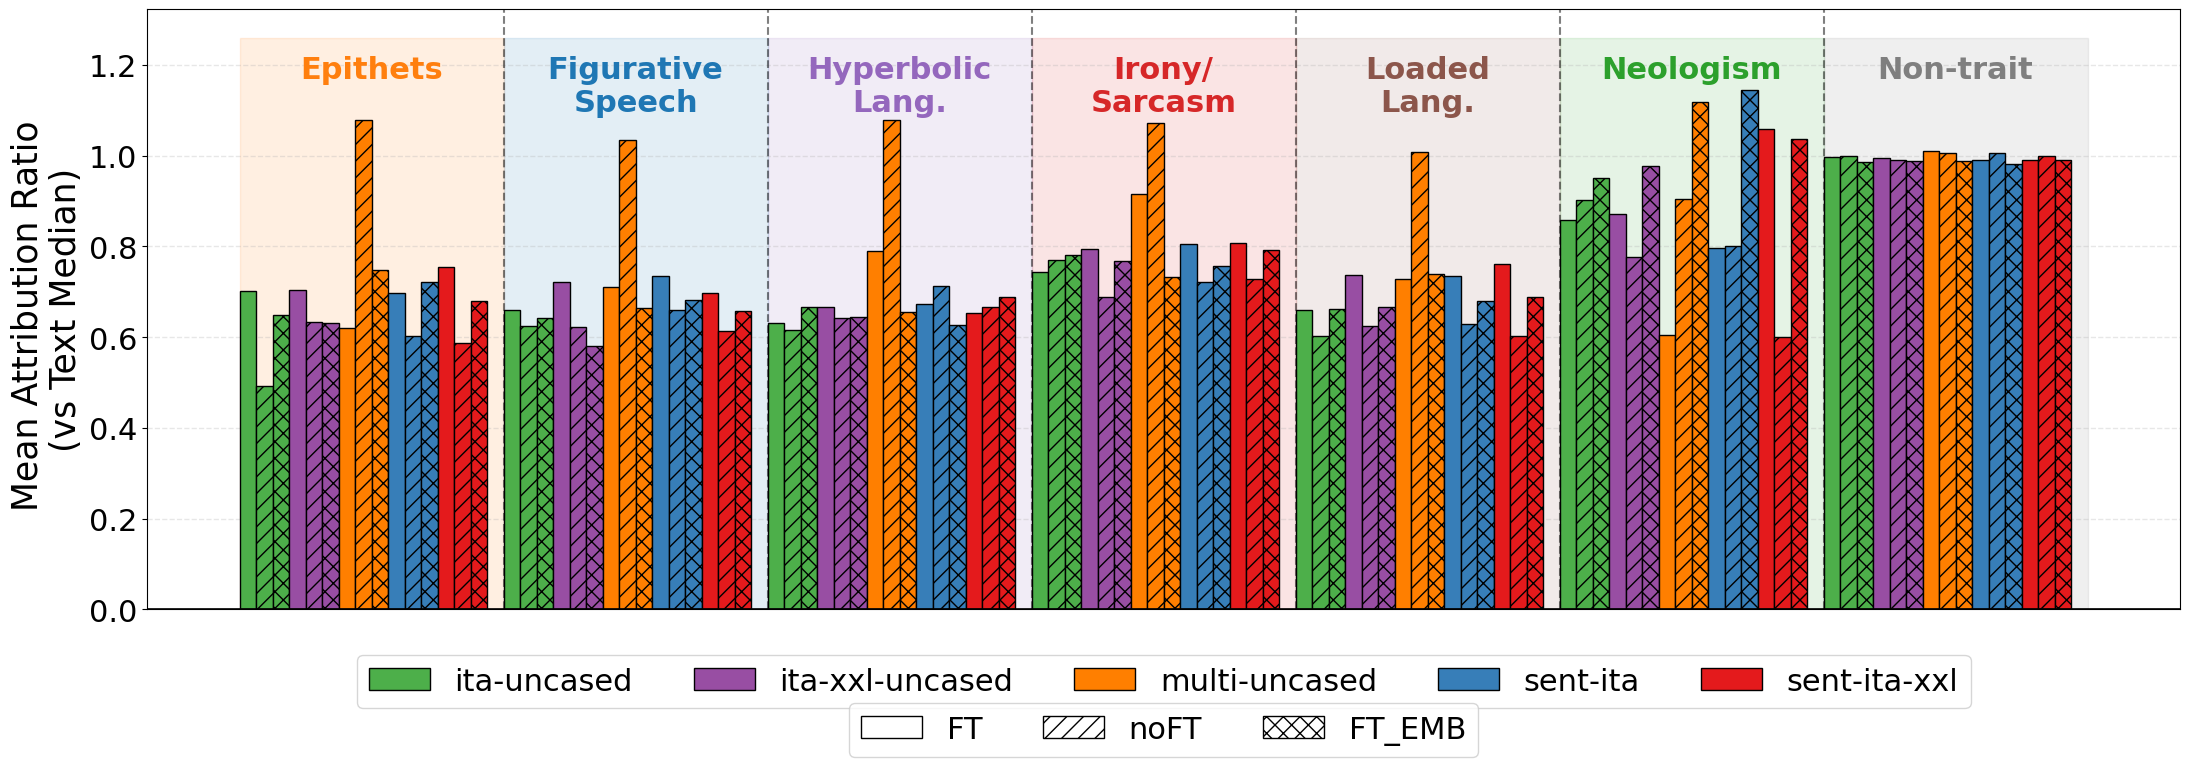

Comparison plot with 3 variants created successfully!
Comparison analysis completed!

Data summary:
model            variant
ita-uncased      FT         0.749808
                 FT_EMB     0.762535
                 noFT       0.715042
ita-xxl-uncased  FT         0.784387
                 FT_EMB     0.750702
                 noFT       0.711030
multi-uncased    FT         0.768425
                 FT_EMB     0.806766
                 noFT       1.025971
sent-ita         FT         0.775743
                 FT_EMB     0.799058
                 noFT       0.733180
sent-ita-xxl     FT         0.817472
                 FT_EMB     0.790354
                 noFT       0.685370
Name: mean_ratio, dtype: float64


In [21]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch, Rectangle
import json
from collections import defaultdict

# Create output directory for comparison analysis
comparison_dir = os.path.join(base_output_dir, "comparison_analysis")
os.makedirs(comparison_dir, exist_ok=True)

# Define model name mapping - comprehensive mapping for all variants
model_name_mapping = {
    # Standard HuggingFace names (noFT)
    'nickprock/sentence-bert-base-italian-xxl-uncased': 'sent-ita-xxl',
    'nickprock/sentence-bert-base-italian-uncased': 'sent-ita',
    'dbmdz/bert-base-italian-uncased': 'ita-uncased',
    'dbmdz/bert-base-italian-xxl-uncased': 'ita-xxl-uncased',
    "google-bert/bert-base-multilingual-uncased": "multi-uncased",
    
    # HIPP variants (FT models) - exact matches
    'sent-ita-xxl': 'sent-ita-xxl',
    'sent-ita': 'sent-ita',
    'bert-ita': 'ita-uncased', 
    'bert-ita-xxl': 'ita-xxl-uncased',
    'multi': 'multi-uncased',

    # HIPP variants (FT_EMB models) - exact matches
    'arch-sent-ita-xxl': 'sent-ita-xxl',
    'arch-sent-ita': 'sent-ita',
    'arch-bert-ita': 'ita-uncased', 
    'arch-bert-ita-xxl': 'ita-xxl-uncased',
    'arch-multi-reft': 'multi-uncased'
}

# Define custom model colors (using normalized names as keys)
model_color_map = {
    'sent-ita-xxl': '#e41a1c',      # Red
    'sent-ita': '#377eb8',          # Blue
    'ita-uncased': '#4daf4a',       # Green
    'ita-xxl-uncased': '#984ea3',   # Purple
    'multi-uncased': '#ff7f00',     # Orange
}

# Define trait colors (consistent with previous plot)
trait_colors = {
    'Figurative_Speech': '#1f77b4',          # Blue
    'Epithet': '#ff7f0e',                    # Orange  
    'Neologism': '#2ca02c',                  # Green
    'Irony/Sarcasm': '#d62728',              # Red
    'Hyperbolic_Language': '#9467bd',        # Purple
    'Loaded_language': '#8c564b',            # Brown
    'non-trait': '#7f7f7f'                   # Gray for non-trait
}

# Feature name mapping for display
feature_name_mapping = {
    'Figurative_Speech': 'Figurative\nSpeech',
    'Epithet': 'Epithets',
    'Neologism': 'Neologism',
    'Irony/Sarcasm': 'Irony/\nSarcasm',
    'Hyperbolic_Language': 'Hyperbolic\nLang.',
    'Loaded_language': 'Loaded\nLang.',
    'non-trait': 'Non-trait'
}

# Hatches for FT, noFT, and FT_EMB
hatches = {'FT': '', 'noFT': '//', 'FT_EMB': 'xx'}

def load_and_process_data(base_dir):
    """Load and process data from a given directory"""
    combined_csv_path = os.path.join(base_dir, "combined_attribution_results.csv")
    threshold_json_path = os.path.join(base_dir, "percentile_results.json")
    
    if not os.path.exists(combined_csv_path):
        print(f"Combined results not found: {combined_csv_path}")
        return None, None
    if not os.path.exists(threshold_json_path):
        print(f"Threshold results not found: {threshold_json_path}")
        return None, None
    
    try:
        # Load combined results
        combined_results = pd.read_csv(combined_csv_path)
        print(f"Loaded combined results from {base_dir}: {len(combined_results)} rows")
        print(f"Models in data: {sorted(combined_results['model'].unique())}")
        print(f"Traits in data: {sorted(combined_results['trait'].unique())}")
        
        # Load threshold results
        with open(threshold_json_path, 'r') as f:
            threshold_results = json.load(f)
        
        models = sorted(combined_results['model'].unique())
        
        # Handle if it's a list (possible generation artifact)
        if isinstance(threshold_results, list):
            print(f"Threshold results loaded as list for {base_dir}, length: {len(threshold_results)}")
            if len(threshold_results) == len(models):
                combined_threshold = {}
                for model, res in zip(models, threshold_results):
                    for perc in res:
                        if perc not in combined_threshold:
                            combined_threshold[perc] = {}
                        combined_threshold[perc][model] = res[perc]
                threshold_results = combined_threshold
            else:
                print(f"Warning: List length {len(threshold_results)} does not match models {len(models)}. Using as is.")
        else:
            print(f"Threshold results loaded as {type(threshold_results)} for {base_dir}")
        
        print(f"Loaded threshold results from {base_dir}")
        
        return combined_results, threshold_results
    except Exception as e:
        print(f"Error loading data from {base_dir}: {e}")
        return None, None

def normalize_model_name(model_name, variant):
    """Normalize model name to consistent unified short form for comparison."""
    model_clean = model_name.lower().replace('-', '').replace('_', '').replace('/', '')
    
    mapping_patterns = {
        # --- FT models ---
        'bertita': 'ita-uncased',
        'bertitaxxl': 'ita-xxl-uncased',
        '^multi$': 'multi-uncased',
        'sentita$': 'sent-ita',
        'sentitaxxl': 'sent-ita-xxl',
        'multi': 'multi-uncased',

        # --- noFT models ---
        'dbmdzbertbaseitalianuncased$': 'ita-uncased',
        'dbmdzbertbaseitalianxxluncased': 'ita-xxl-uncased',
        'googlebertbertbasemultilingualuncased': 'multi-uncased',
        'nickprocksentencebertbaseitalianuncased$': 'sent-ita',
        'nickprocksentencebertbaseitalianxxluncased': 'sent-ita-xxl',

        # --- FT_EMB models ---
        'archbertita': 'ita-uncased',
        'archbertitaxxl': 'ita-xxl-uncased',
        'archmultireft': 'multi-uncased',
        'archsentita$': 'sent-ita',
        'archsentitaxxl': 'sent-ita-xxl',
    }

    # --- Explicit handling for FT models ---
    if variant == 'FT':
        if model_name == 'bert-ita':
            return 'ita-uncased'
        elif model_name == 'bert-ita-xxl':
            return 'ita-xxl-uncased'
        elif model_name == 'multi':
            return 'multi-uncased'
        elif model_name == 'sent-ita':
            return 'sent-ita'
        elif model_name == 'sent-ita-xxl':
            return 'sent-ita-xxl'
        
    # --- ✅ Explicit handling for noFT models ---
    if variant == 'noFT':
        if model_name in ['bert-ita', 'bert-base-italian-uncased']:
            return 'ita-uncased'
        elif model_name in ['bert-ita-xxl', 'bert-base-italian-xxl-uncased']:
            return 'ita-xxl-uncased'
        elif model_name in ['multi', 'bert-base-multilingual-cased', 'bert-base-multilingual-uncased']:
            return 'multi-uncased'
        elif model_name in ['sent-ita', 'sentence-bert-base-italian-uncased']:
            return 'sent-ita'
        elif model_name in ['sent-ita-xxl', 'sentence-bert-base-italian-xxl-uncased']:
            return 'sent-ita-xxl'

    # --- ✅ NEW: Explicit handling for noFT models ---
    if variant == 'noFT':
        if model_name == 'bert-ita':
            return 'ita-uncased'
        elif model_name == 'bert-ita-xxl':
            return 'ita-xxl-uncased'
        elif model_name == 'multi':
            return 'multi-uncased'
        elif model_name == 'sent-ita':
            return 'sent-ita'
        elif model_name == 'sent-ita-xxl':
            return 'sent-ita-xxl'

    # --- Existing FT_EMB handling ---
    if variant == 'FT_EMB':
        if model_name == 'arch-bert-ita':
            return 'ita-uncased'
        elif model_name == 'arch-bert-ita-xxl':
            return 'ita-xxl-uncased'
        elif model_name == 'arch-multi':
            return 'multi-uncased'
        elif model_name == 'arch-sent-ita':
            return 'sent-ita'
        elif model_name == 'arch-sent-ita-xxl':
            return 'sent-ita-xxl'
    
    # --- Fallback pattern matching ---
    for pattern, normalized_name in mapping_patterns.items():
        if pattern.endswith('$'):
            clean_pattern = pattern.replace('$', '')
            if model_clean == clean_pattern:
                return normalized_name
        else:
            if pattern in model_clean:
                return normalized_name

    print(f"⚠️ Warning: Could not normalize model name: {model_name} -> {model_clean}")
    return model_name

def create_comparison_plot(ft_data, noft_data, ft_emb_data, ratio_thresholds=[0]):
    """Create comparison plot showing FT, noFT, and FT_EMB variants for each model and trait"""
    
    if ft_data[0] is None or noft_data[0] is None or ft_emb_data[0] is None:
        print("Missing data, cannot create plot")
        return None
    
    # Get traits and models
    ft_traits = sorted(ft_data[0]["trait"].unique()) if not ft_data[0].empty else []
    noft_traits = sorted(noft_data[0]["trait"].unique()) if not noft_data[0].empty else []
    ft_emb_traits = sorted(ft_emb_data[0]["trait"].unique()) if not ft_emb_data[0].empty else []
    common_traits = sorted(set(ft_traits) & set(noft_traits) & set(ft_emb_traits))
    
    ft_models = sorted(ft_data[0]["model"].unique()) if not ft_data[0].empty else []
    noft_models = sorted(noft_data[0]["model"].unique()) if not noft_data[0].empty else []
    ft_emb_models = sorted(ft_emb_data[0]["model"].unique()) if not ft_emb_data[0].empty else []
    
    print(f"FT models (original): {ft_models}")
    print(f"noFT models (original): {noft_models}")
    print(f"FT_EMB models (original): {ft_emb_models}")
    
    # Normalize model names with variant information
    ft_models_normalized = [normalize_model_name(model, 'FT') for model in ft_models]
    noft_models_normalized = [normalize_model_name(model, 'noFT') for model in noft_models]
    ft_emb_models_normalized = [normalize_model_name(model, 'FT_EMB') for model in ft_emb_models]
    
    print(f"FT models (normalized): {ft_models_normalized}")
    print(f"noFT models (normalized): {noft_models_normalized}")
    print(f"FT_EMB models (normalized): {ft_emb_models_normalized}")
    
    # Get all unique normalized models
    all_models_normalized = sorted(set(ft_models_normalized + noft_models_normalized + ft_emb_models_normalized))
    print(f"All normalized models: {all_models_normalized}")
    
    if not all_models_normalized:
        print("No models found after normalization!")
        return None
    
    # Create mapping from normalized to original names for each variant
    ft_model_mapping = {}
    for orig, norm in zip(ft_models, ft_models_normalized):
        ft_model_mapping[norm] = orig
    
    noft_model_mapping = {}
    for orig, norm in zip(noft_models, noft_models_normalized):
        noft_model_mapping[norm] = orig
        
    ft_emb_model_mapping = {}
    for orig, norm in zip(ft_emb_models, ft_emb_models_normalized):
        ft_emb_model_mapping[norm] = orig
    
    print(f"FT mapping: {ft_model_mapping}")
    print(f"noFT mapping: {noft_model_mapping}")
    print(f"FT_EMB mapping: {ft_emb_model_mapping}")
    
    # Prepare combined data for plotting - using MEAN RATIO
    plot_data = []
    
    # Add FT data - using mean_ratio
    for trait in common_traits + ['non-trait']:
        for model_norm in all_models_normalized:
            if model_norm not in ft_model_mapping:
                continue  # Skip if this model doesn't exist in FT data
                
            model_orig = ft_model_mapping[model_norm]
            try:
                if trait == 'non-trait':
                    mean_ratio = ft_data[1][str(ratio_thresholds[0])][model_orig].get("non_trait", {}).get("mean_ratio", 0)
                else:
                    mean_ratio = ft_data[1][str(ratio_thresholds[0])][model_orig][trait]["mean_ratio"]
                
                plot_data.append({
                    "trait": trait,
                    "model": model_norm,
                    "mean_ratio": mean_ratio,
                    "variant": "FT"
                })
                print(f"FT: {model_orig} -> {model_norm}, {trait}: mean_ratio={mean_ratio:.3f}")
            except KeyError as e:
                print(f"KeyError for FT data - model: {model_orig}, trait: {trait}: {e}")
                continue
    
    # Add noFT data - using mean_ratio
    for trait in common_traits + ['non-trait']:
        for model_norm in all_models_normalized:
            if model_norm not in noft_model_mapping:
                continue  # Skip if this model doesn't exist in noFT data
                
            model_orig = noft_model_mapping[model_norm]
            try:
                if trait == 'non-trait':
                    mean_ratio = noft_data[1][str(ratio_thresholds[0])][model_orig].get("non_trait", {}).get("mean_ratio", 0)
                else:
                    mean_ratio = noft_data[1][str(ratio_thresholds[0])][model_orig][trait]["mean_ratio"]
                
                plot_data.append({
                    "trait": trait,
                    "model": model_norm,
                    "mean_ratio": mean_ratio,
                    "variant": "noFT"
                })
                print(f"noFT: {model_orig} -> {model_norm}, {trait}: mean_ratio={mean_ratio:.3f}")
            except KeyError as e:
                print(f"KeyError for noFT data - model: {model_orig}, trait: {trait}: {e}")
                continue
                
    # Add FT_EMB data - using mean_ratio
    for trait in common_traits + ['non-trait']:
        for model_norm in all_models_normalized:
            if model_norm not in ft_emb_model_mapping:
                continue  # Skip if this model doesn't exist in FT_EMB data
                
            model_orig = ft_emb_model_mapping[model_norm]
            try:
                if trait == 'non-trait':
                    mean_ratio = ft_emb_data[1][str(ratio_thresholds[0])][model_orig].get("non_trait", {}).get("mean_ratio", 0)
                else:
                    mean_ratio = ft_emb_data[1][str(ratio_thresholds[0])][model_orig][trait]["mean_ratio"]
                
                plot_data.append({
                    "trait": trait,
                    "model": model_norm,
                    "mean_ratio": mean_ratio,
                    "variant": "FT_EMB"
                })
                print(f"FT_EMB: {model_orig} -> {model_norm}, {trait}: mean_ratio={mean_ratio:.3f}")
            except KeyError as e:
                print(f"KeyError for FT_EMB data - model: {model_orig}, trait: {trait}: {e}")
                continue
    
    # Convert to DataFrame
    df_plot = pd.DataFrame(plot_data)
    
    if df_plot.empty:
        print("No data available after processing")
        return None
    
    print(f"Plot data: {len(df_plot)} rows")
    print(f"Models in plot data: {sorted(df_plot['model'].unique())}")
    print(f"Variants in plot data: {sorted(df_plot['variant'].unique())}")
    print(f"Data columns: {df_plot.columns.tolist()}")
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(22, 10))
    
    # Set up plot parameters - now we have 3 bars per model
    bar_width = 0.12
    n_models = len(all_models_normalized)
    group_width = n_models * 3 * bar_width + bar_width
    
    # Find y-axis limits
    ymin = min(0, df_plot['mean_ratio'].min())
    ymax = df_plot['mean_ratio'].max() * 1.1
    
    # Background colored zones for each trait
    unique_traits = common_traits + ['non-trait']
    
    trait_label_positions = []
    
    for i, trait in enumerate(unique_traits):
        x_start = i * group_width - bar_width / 2
        rect = Rectangle(
            (x_start, ymin),
            group_width,
            ymax - ymin,
            color=trait_colors.get(trait, '#7f7f7f'),
            alpha=0.12,
            zorder=0
        )
        ax.add_patch(rect)
        
        # Calculate center position for trait label
        x_center = x_start + group_width / 2
        trait_label_positions.append((x_center, trait))
    
    # Plot the bars - FT, noFT, and FT_EMB for each model and trait
    for trait_idx, trait in enumerate(unique_traits):
        trait_x_start = trait_idx * group_width
        
        for model_idx, model_name in enumerate(all_models_normalized):
            # Get values for each variant
            ft_value = df_plot[
                (df_plot['trait'] == trait) & 
                (df_plot['model'] == model_name) & 
                (df_plot['variant'] == 'FT')
            ]['mean_ratio']
            
            noft_value = df_plot[
                (df_plot['trait'] == trait) & 
                (df_plot['model'] == model_name) & 
                (df_plot['variant'] == 'noFT')
            ]['mean_ratio']
            
            ft_emb_value = df_plot[
                (df_plot['trait'] == trait) & 
                (df_plot['model'] == model_name) & 
                (df_plot['variant'] == 'FT_EMB')
            ]['mean_ratio']
            
            ft_val = ft_value.iloc[0] if len(ft_value) > 0 else 0
            noft_val = noft_value.iloc[0] if len(noft_value) > 0 else 0
            ft_emb_val = ft_emb_value.iloc[0] if len(ft_emb_value) > 0 else 0
            
            color = model_color_map.get(model_name, plt.cm.Dark2(model_idx / len(all_models_normalized)))
            
            # Plot FT bar (if exists)
            if len(ft_value) > 0:
                ax.bar(
                    trait_x_start + model_idx * 3 * bar_width,
                    ft_val,
                    bar_width,
                    color=color,
                    hatch=hatches['FT'],
                    edgecolor='black',
                    zorder=2
                )
            
            # Plot noFT bar (if exists)
            if len(noft_value) > 0:
                ax.bar(
                    trait_x_start + model_idx * 3 * bar_width + bar_width,
                    noft_val,
                    bar_width,
                    color=color,
                    hatch=hatches['noFT'],
                    edgecolor='black',
                    zorder=2
                )
                
            # Plot FT_EMB bar (if exists)
            if len(ft_emb_value) > 0:
                ax.bar(
                    trait_x_start + model_idx * 3 * bar_width + 2 * bar_width,
                    ft_emb_val,
                    bar_width,
                    color=color,
                    hatch=hatches['FT_EMB'],
                    edgecolor='black',
                    zorder=2
                )
    
    # Add vertical separators between traits
    for i in range(1, len(unique_traits)):
        x_pos = i * group_width - (bar_width / 2)
        ax.axvline(x=x_pos, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
    
    # Axis formatting
    ax.set_ylabel('Mean Attribution Ratio \n(vs Text Median)', fontsize=25)
    ax.set_xlabel('')
    ax.set_xticks([])
    
    # Add trait labels inside the plot at the top
    for x_center, trait in trait_label_positions:
        label_text = feature_name_mapping.get(trait, trait)
        ax.text(
            x_center, 
            ymax * 0.97,
            label_text,
            ha='center',
            va='top',
            fontsize=22,
            color=trait_colors.get(trait, '#7f7f7f'),
            weight='bold',
            rotation=0
        )
    
    ax.tick_params(axis='y', labelsize=22)
    ax.yaxis.get_offset_text().set_fontsize(22)
    ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=1)
    ax.set_axisbelow(True)
    ax.axhline(y=0, color='black', linewidth=1.2)
    
    # Legends
    # Model color legend - using the normalized names
    model_patches = [
        Patch(facecolor=model_color_map.get(m, plt.cm.Dark2(i/len(all_models_normalized))), 
              edgecolor='black', 
              label=m)
        for i, m in enumerate(all_models_normalized)
    ]
    
    # Hatch legend - now with 3 variants
    hatch_patches = [
        Patch(facecolor='white', edgecolor='black', hatch=hatches['FT'], label='FT'),
        Patch(facecolor='white', edgecolor='black', hatch=hatches['noFT'], label='noFT'),
        Patch(facecolor='white', edgecolor='black', hatch=hatches['FT_EMB'], label='FT_EMB')
    ]
    
    # Create legends at the bottom
    legend1 = ax.legend(handles=model_patches, 
                       loc='upper center', bbox_to_anchor=(0.5, -0.05),
                       ncol=min(len(all_models_normalized), 5), fontsize=22, title_fontsize=18)
    
    ax.add_artist(legend1)
    
    legend2 = ax.legend(handles=hatch_patches, 
                       loc='upper center', bbox_to_anchor=(0.5, -0.13),
                       ncol=3, fontsize=22, title_fontsize=18)
    
    # Adjust layout to accommodate the third legend
    fig.tight_layout(rect=[0, 0.15, 1, 0.95])
    
    # Save plot
    plt.savefig(os.path.join(comparison_dir, 'mean_attribution_ratio_comparison_3way.png'), 
                bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()
    
    # Also save the data for reference
    df_plot['model_display'] = df_plot['model']  # Already using the normalized names
    df_plot['trait_display'] = df_plot['trait'].map(feature_name_mapping)
    df_plot.to_csv(os.path.join(comparison_dir, 'mean_ratio_comparison_data_3way.csv'), index=False)
    
    print("Comparison plot with 3 variants created successfully!")
    return df_plot

# Main execution
print("Loading FT data...")
ft_data = load_and_process_data(base_output_dir_FT)

print("Loading noFT data...")
noft_data = load_and_process_data(base_output_dir_no_FT)

print("Loading FT_EMB data...")
ft_emb_data = load_and_process_data(base_output_dir_FT_EMB_top)

if ft_data[0] is not None and noft_data[0] is not None and ft_emb_data[0] is not None:
    print("Creating comparison plot with 3 variants...")
    comparison_results = create_comparison_plot(ft_data, noft_data, ft_emb_data)
    if comparison_results is not None:
        print("Comparison analysis completed!")
        print("\nData summary:")
        print(comparison_results.groupby(['model', 'variant'])['mean_ratio'].mean())
    else:
        print("Comparison analysis failed - check the output above for details.")
else:
    print("Could not load data from one or more directories.")

Loading FT data...
Loaded combined results from /home/michele.maggini/CT_3results_FT_newThresholds: 6809 rows
Models in data: ['bert-ita', 'bert-ita-xxl', 'multi', 'sent-ita', 'sent-ita-xxl']
Traits in data: ['Epithet', 'Figurative_Speech', 'Hyperbolic_Language', 'Irony/Sarcasm', 'Loaded_language', 'Neologism']
Threshold results loaded as <class 'dict'> for /home/michele.maggini/CT_3results_FT_newThresholds
Loaded threshold results from /home/michele.maggini/CT_3results_FT_newThresholds
Loading noFT data...
Loaded combined results from /home/michele.maggini/CT_3results_pretrained_newThresholds: 7060 rows
Models in data: ['bert-base-italian-uncased', 'bert-base-italian-xxl-uncased', 'bert-base-multilingual-cased', 'sentence-bert-base-italian-uncased', 'sentence-bert-base-italian-xxl-uncased']
Traits in data: ['Epithet', 'Figurative_Speech', 'Hyperbolic_Language', 'Irony/Sarcasm', 'Loaded_language', 'Neologism']
Threshold results loaded as <class 'dict'> for /home/michele.maggini/CT_3res

/tmp/ipykernel_898604/1232124635.py:247: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variant_data['model_trait'] = variant_data['model'] + '_' + variant_data['trait']
/tmp/ipykernel_898604/1232124635.py:247: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variant_data['model_trait'] = variant_data['model'] + '_' + variant_data['trait']
/tmp/ipykernel_898604/1232124635.py:247: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

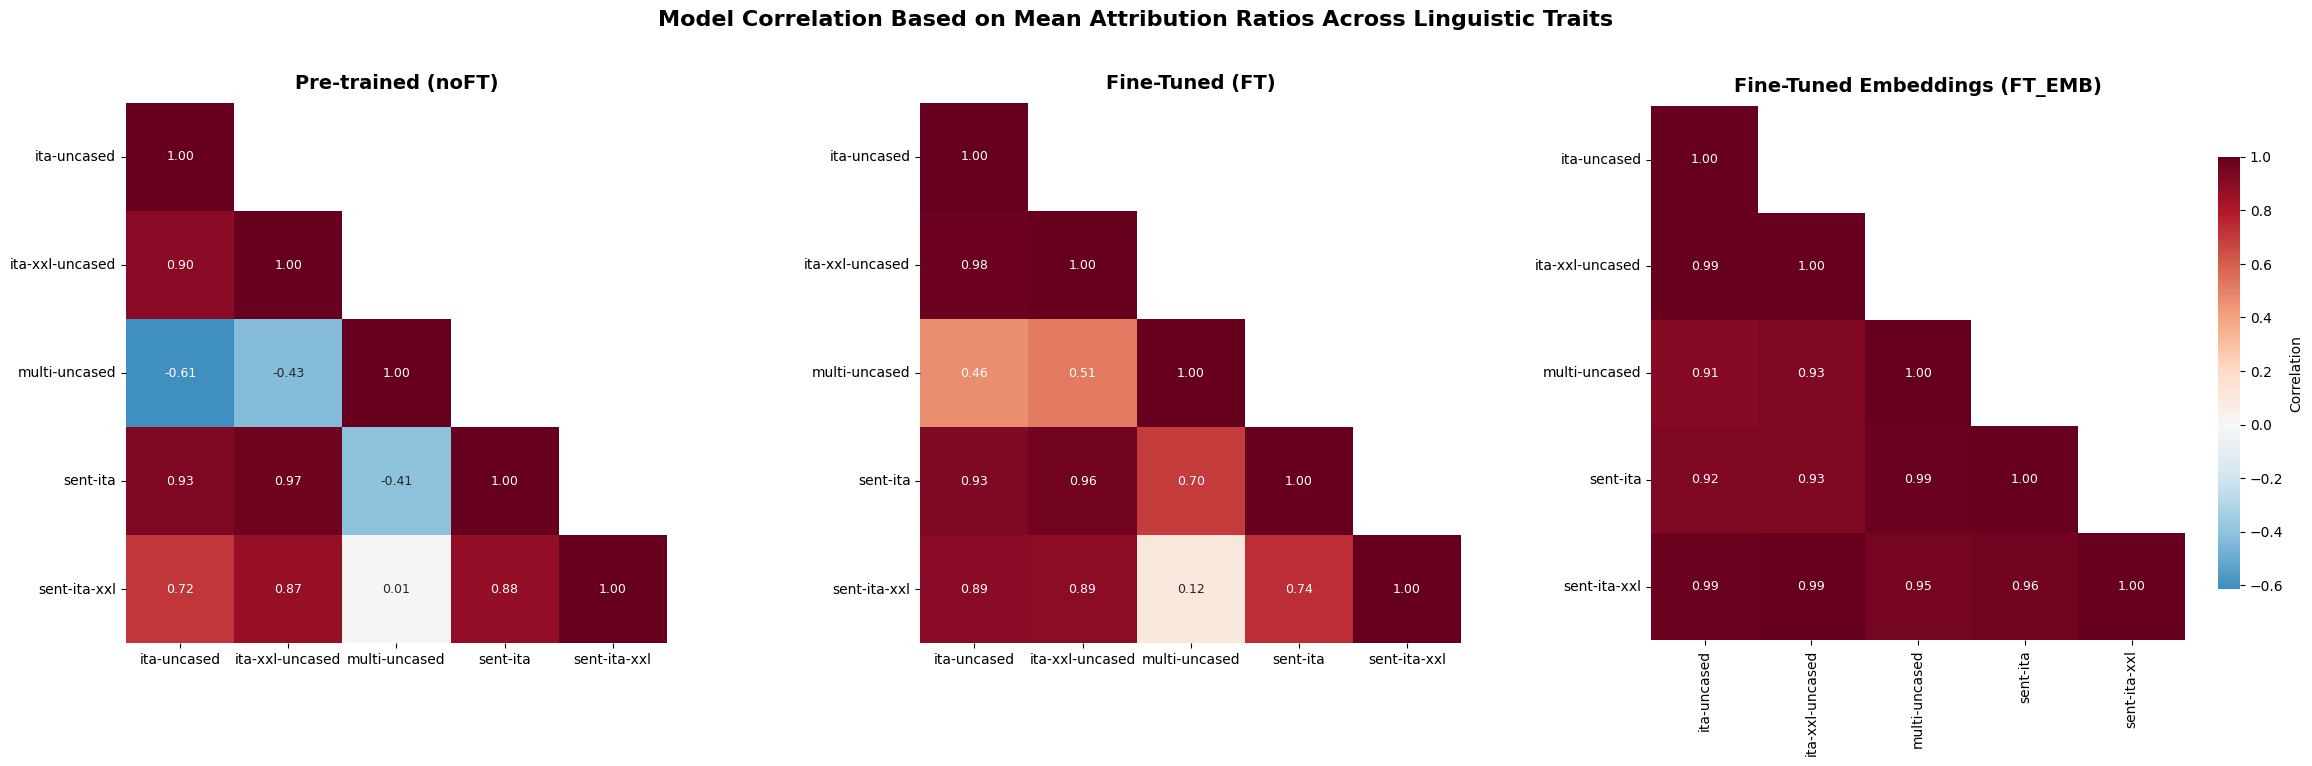

✅ Correlation heatmaps created successfully!

BEST VARIANT ANALYSIS BY LINGUISTIC TRAIT AND MODEL

📊 LINGUISTIC TRAIT: Epithets
------------------------------------------------------------
  ita-uncased     → Best: FT     (Mean Ratio: 0.702)
  ita-xxl-uncased → Best: FT     (Mean Ratio: 0.704)
  multi-uncased   → Best: noFT   (Mean Ratio: 1.079)
  sent-ita        → Best: FT_EMB (Mean Ratio: 0.721)
  sent-ita-xxl    → Best: FT     (Mean Ratio: 0.756)

📊 LINGUISTIC TRAIT: Figurative
Speech
------------------------------------------------------------
  ita-uncased     → Best: FT     (Mean Ratio: 0.659)
  ita-xxl-uncased → Best: FT     (Mean Ratio: 0.722)
  multi-uncased   → Best: noFT   (Mean Ratio: 1.034)
  sent-ita        → Best: FT     (Mean Ratio: 0.735)
  sent-ita-xxl    → Best: FT     (Mean Ratio: 0.698)

📊 LINGUISTIC TRAIT: Hyperbolic
Lang.
------------------------------------------------------------
  ita-uncased     → Best: FT_EMB (Mean Ratio: 0.666)
  ita-xxl-uncased → Best: FT 

<Figure size 1600x1000 with 0 Axes>

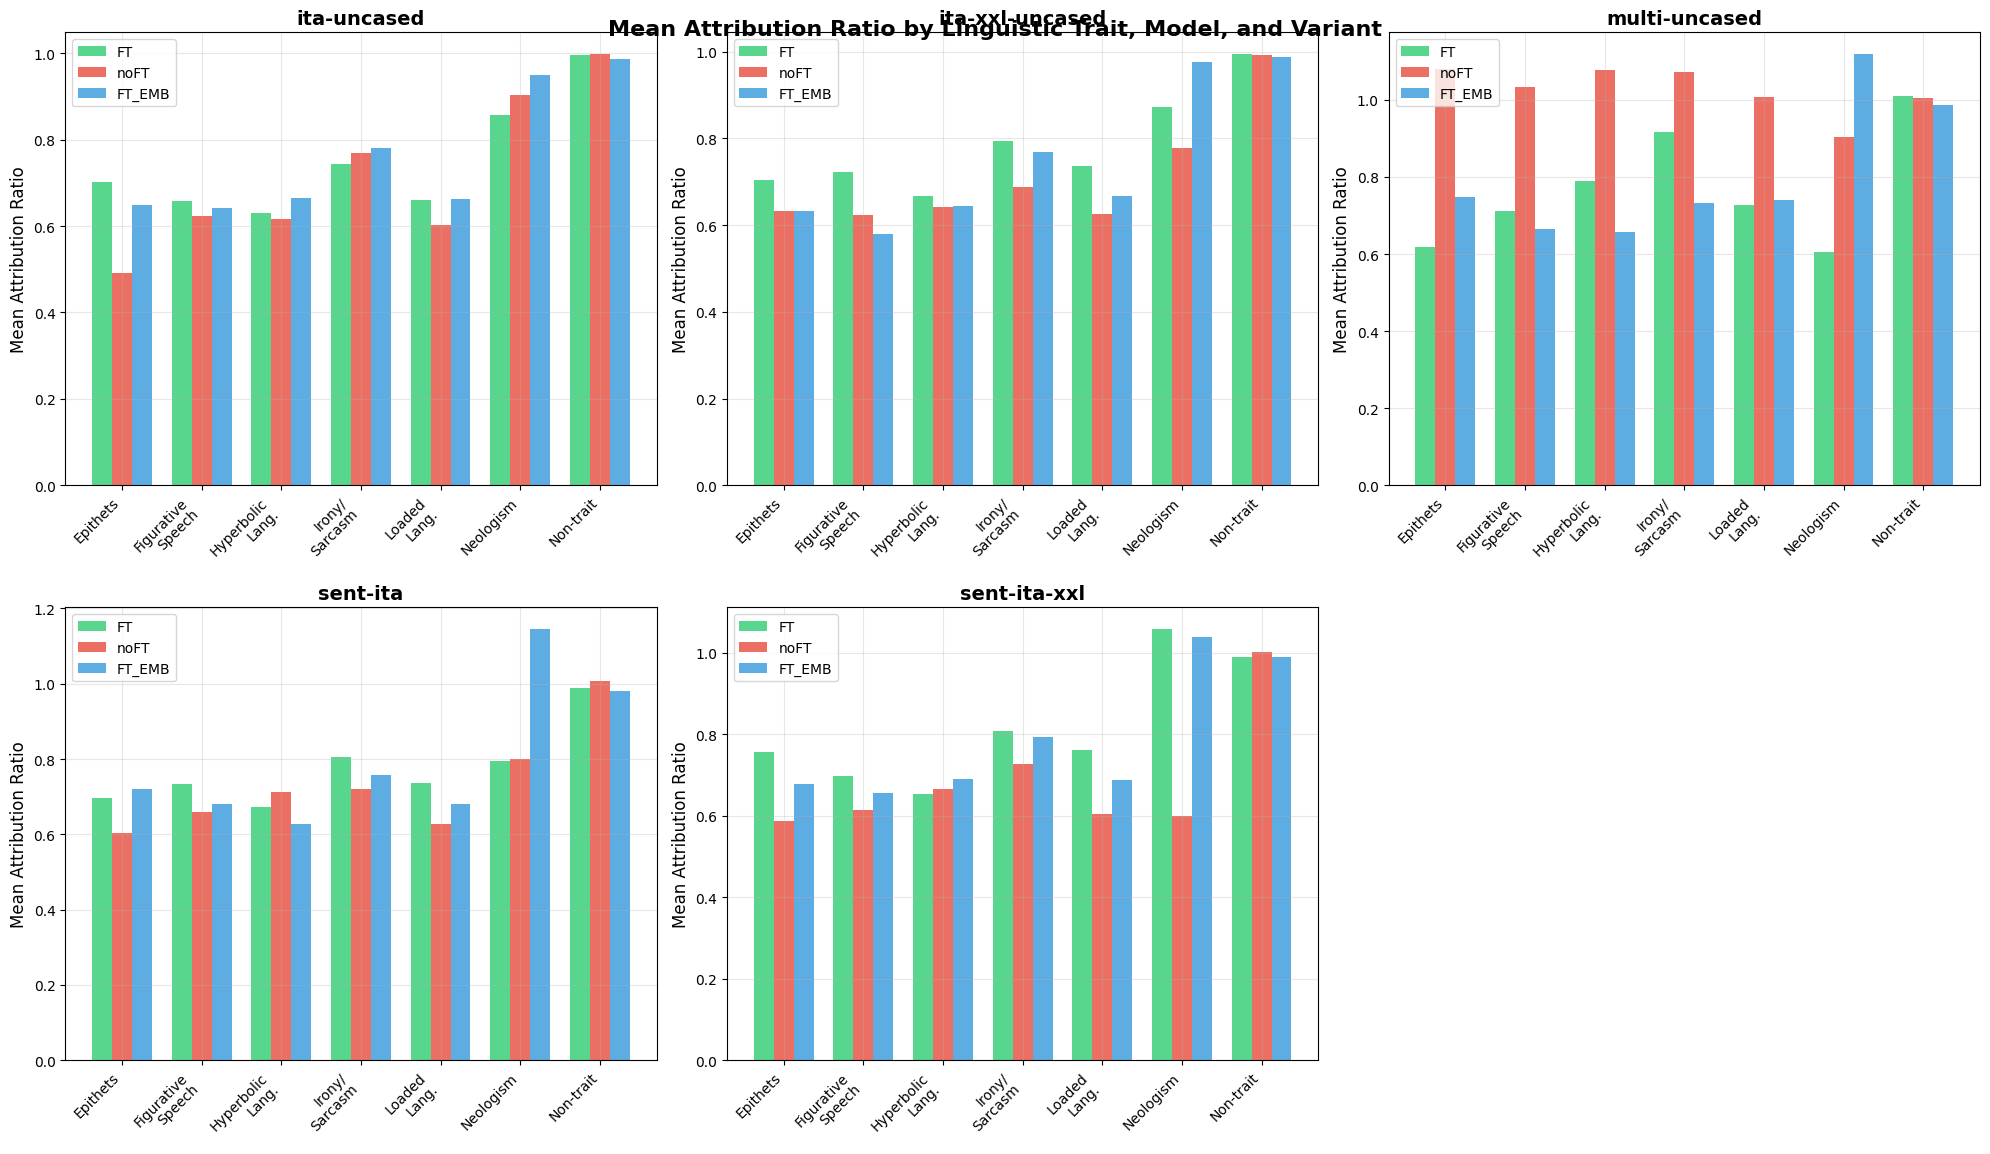


DETAILED INSIGHTS FOR WRITING ANALYSIS

📈 PERFORMANCE IMPROVEMENT ANALYSIS:

  Epithets:
    FT vs noFT:     +2.5%
    FT_EMB vs noFT: +1.0%
    FT_EMB vs FT:   -1.4%

  Figurative
Speech:
    FT vs noFT:     -0.8%
    FT_EMB vs noFT: -9.2%
    FT_EMB vs FT:   -8.5%

  Hyperbolic
Lang.:
    FT vs noFT:     -8.1%
    FT_EMB vs noFT: -11.7%
    FT_EMB vs FT:   -3.9%

  Irony/
Sarcasm:
    FT vs noFT:     +2.3%
    FT_EMB vs noFT: -3.6%
    FT_EMB vs FT:   -5.8%

  Loaded
Lang.:
    FT vs noFT:     +4.4%
    FT_EMB vs noFT: -0.9%
    FT_EMB vs FT:   -5.1%

  Neologism:
    FT vs noFT:     +5.1%
    FT_EMB vs noFT: +31.2%
    FT_EMB vs FT:   +24.9%

✅ Analysis complete! Files saved in: /home/michele.maggini/IG_FINAL/comparison_analysis

🎯 ANALYSIS COMPLETE!
Use the outputs above to write your analysis paragraph.

Key questions to address:
1. Which variant (FT, noFT, FT_EMB) generally performs best?
2. Does FT_EMB show improved attention to linguistic traits compared to FT?
3. Are there sp

In [22]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch, Rectangle
import json
from collections import defaultdict


# Define the FT_EMB model directories (assuming single directory for all arch models)
ft_emb_model_dirs = [base_output_dir_FT_EMB_top]


# Hatches for FT, noFT, and FT_EMB
hatches = {'FT': '', 'noFT': '//', 'FT_EMB': 'xx'}

def load_and_process_data(base_dir):
    """Load and process data from a given directory"""
    combined_csv_path = os.path.join(base_dir, "combined_attribution_results.csv")
    threshold_json_path = os.path.join(base_dir, "percentile_results.json")
    
    if not os.path.exists(combined_csv_path):
        print(f"Combined results not found: {combined_csv_path}")
        return None, None
    if not os.path.exists(threshold_json_path):
        print(f"Threshold results not found: {threshold_json_path}")
        return None, None
    
    try:
        # Load combined results
        combined_results = pd.read_csv(combined_csv_path)
        print(f"Loaded combined results from {base_dir}: {len(combined_results)} rows")
        print(f"Models in data: {sorted(combined_results['model'].unique())}")
        print(f"Traits in data: {sorted(combined_results['trait'].unique())}")
        
        # Load threshold results
        with open(threshold_json_path, 'r') as f:
            threshold_results = json.load(f)
        
        models = sorted(combined_results['model'].unique())
        
        # Handle if it's a list (possible generation artifact)
        if isinstance(threshold_results, list):
            print(f"Threshold results loaded as list for {base_dir}, length: {len(threshold_results)}")
            if len(threshold_results) == len(models):
                combined_threshold = {}
                for model, res in zip(models, threshold_results):
                    for perc in res:
                        if perc not in combined_threshold:
                            combined_threshold[perc] = {}
                        combined_threshold[perc][model] = res[perc]
                threshold_results = combined_threshold
            else:
                print(f"Warning: List length {len(threshold_results)} does not match models {len(models)}. Using as is.")
        else:
            print(f"Threshold results loaded as {type(threshold_results)} for {base_dir}")
        
        print(f"Loaded threshold results from {base_dir}")
        
        return combined_results, threshold_results
    except Exception as e:
        print(f"Error loading data from {base_dir}: {e}")
        return None, None

def normalize_model_name(model_name, variant):
    """Normalize model name to consistent unified short form for comparison."""
    model_clean = model_name.lower().replace('-', '').replace('_', '').replace('/', '')
    
    mapping_patterns = {
        # --- FT models ---
        'bertita': 'ita-uncased',
        'bertitaxxl': 'ita-xxl-uncased',
        '^multi$': 'multi-uncased',
        'sentita$': 'sent-ita',
        'sentitaxxl': 'sent-ita-xxl',
        'multi': 'multi-uncased',

        # --- noFT models ---
        'dbmdzbertbaseitalianuncased$': 'ita-uncased',
        'dbmdzbertbaseitalianxxluncased': 'ita-xxl-uncased',
        'googlebertbertbasemultilingualuncased': 'multi-uncased',
        'nickprocksentencebertbaseitalianuncased$': 'sent-ita',
        'nickprocksentencebertbaseitalianxxluncased': 'sent-ita-xxl',

        # --- FT_EMB models ---
        'archbertita': 'ita-uncased',
        'archbertitaxxl': 'ita-xxl-uncased',
        'archmultireft': 'multi-uncased',
        'archsentita$': 'sent-ita',
        'archsentitaxxl': 'sent-ita-xxl',
    }

    # --- Explicit handling for FT models ---
    if variant == 'FT':
        if model_name == 'bert-ita':
            return 'ita-uncased'
        elif model_name == 'bert-ita-xxl':
            return 'ita-xxl-uncased'
        elif model_name == 'multi':
            return 'multi-uncased'
        elif model_name == 'sent-ita':
            return 'sent-ita'
        elif model_name == 'sent-ita-xxl':
            return 'sent-ita-xxl'
        
    # --- ✅ Explicit handling for noFT models ---
    if variant == 'noFT':
        if model_name in ['bert-ita', 'bert-base-italian-uncased']:
            return 'ita-uncased'
        elif model_name in ['bert-ita-xxl', 'bert-base-italian-xxl-uncased']:
            return 'ita-xxl-uncased'
        elif model_name in ['multi', 'bert-base-multilingual-cased', 'bert-base-multilingual-uncased']:
            return 'multi-uncased'
        elif model_name in ['sent-ita', 'sentence-bert-base-italian-uncased']:
            return 'sent-ita'
        elif model_name in ['sent-ita-xxl', 'sentence-bert-base-italian-xxl-uncased']:
            return 'sent-ita-xxl'

    # --- ✅ NEW: Explicit handling for noFT models ---
    if variant == 'noFT':
        if model_name == 'bert-ita':
            return 'ita-uncased'
        elif model_name == 'bert-ita-xxl':
            return 'ita-xxl-uncased'
        elif model_name == 'multi':
            return 'multi-uncased'
        elif model_name == 'sent-ita':
            return 'sent-ita'
        elif model_name == 'sent-ita-xxl':
            return 'sent-ita-xxl'

    # --- Existing FT_EMB handling ---
    if variant == 'FT_EMB':
        if model_name == 'arch-bert-ita':
            return 'ita-uncased'
        elif model_name == 'arch-bert-ita-xxl':
            return 'ita-xxl-uncased'
        elif model_name == 'arch-multi':
            return 'multi-uncased'
        elif model_name == 'arch-sent-ita':
            return 'sent-ita'
        elif model_name == 'arch-sent-ita-xxl':
            return 'sent-ita-xxl'
    
    # --- Fallback pattern matching ---
    for pattern, normalized_name in mapping_patterns.items():
        if pattern.endswith('$'):
            clean_pattern = pattern.replace('$', '')
            if model_clean == clean_pattern:
                return normalized_name
        else:
            if pattern in model_clean:
                return normalized_name

    print(f"⚠️ Warning: Could not normalize model name: {model_name} -> {model_clean}")
    return model_name

def create_comprehensive_analysis(ft_data, noft_data, ft_emb_data, ratio_thresholds=[0]):
    """Create comprehensive analysis with correlation plot and best variant analysis"""
    
    if ft_data[0] is None or noft_data[0] is None or ft_emb_data[0] is None:
        print("Missing data, cannot create analysis")
        return None
    
    # Get traits and models
    ft_traits = sorted(ft_data[0]["trait"].unique()) if not ft_data[0].empty else []
    noft_traits = sorted(noft_data[0]["trait"].unique()) if not noft_data[0].empty else []
    ft_emb_traits = sorted(ft_emb_data[0]["trait"].unique()) if not ft_emb_data[0].empty else []
    common_traits = sorted(set(ft_traits) & set(noft_traits) & set(ft_emb_traits))
    
    ft_models = sorted(ft_data[0]["model"].unique()) if not ft_data[0].empty else []
    noft_models = sorted(noft_data[0]["model"].unique()) if not noft_data[0].empty else []
    ft_emb_models = sorted(ft_emb_data[0]["model"].unique()) if not ft_emb_data[0].empty else []
    
    # Normalize model names
    ft_models_normalized = [normalize_model_name(model, 'FT') for model in ft_models]
    noft_models_normalized = [normalize_model_name(model, 'noFT') for model in noft_models]
    ft_emb_models_normalized = [normalize_model_name(model, 'FT_EMB') for model in ft_emb_models]
    
    all_models_normalized = sorted(set(ft_models_normalized + noft_models_normalized + ft_emb_models_normalized))
    
    # Create mapping from normalized to original names
    ft_model_mapping = {norm: orig for orig, norm in zip(ft_models, ft_models_normalized)}
    noft_model_mapping = {norm: orig for orig, norm in zip(noft_models, noft_models_normalized)}
    ft_emb_model_mapping = {norm: orig for orig, norm in zip(ft_emb_models, ft_emb_models_normalized)}
    
    # Prepare combined data
    plot_data = []
    
    # Process all three variants
    variants_data = [
        ('FT', ft_data, ft_model_mapping),
        ('noFT', noft_data, noft_model_mapping),
        ('FT_EMB', ft_emb_data, ft_emb_model_mapping)
    ]
    
    for variant_name, data, mapping in variants_data:
        for trait in common_traits + ['non-trait']:
            for model_norm in all_models_normalized:
                if model_norm not in mapping:
                    continue
                    
                model_orig = mapping[model_norm]
                try:
                    if trait == 'non-trait':
                        mean_ratio = data[1][str(ratio_thresholds[0])][model_orig].get("non_trait", {}).get("mean_ratio", 0)
                    else:
                        mean_ratio = data[1][str(ratio_thresholds[0])][model_orig][trait]["mean_ratio"]
                    
                    plot_data.append({
                        "trait": trait,
                        "model": model_norm,
                        "mean_ratio": mean_ratio,
                        "variant": variant_name
                    })
                except KeyError:
                    continue
    
    df_plot = pd.DataFrame(plot_data)
    
    if df_plot.empty:
        print("No data available after processing")
        return None
    
    # Replace the ANALYSIS 1 section with this code:

    # ANALYSIS 1: Create correlation heatmap (three subplots, one per variant)
    print("\n" + "="*80)
    print("CREATING CORRELATION HEATMAP")
    print("="*80)

    # Create figure with three subplots
    fig, axes = plt.subplots(1, 3, figsize=(24, 7))

    # Define variants to plot (in order: noFT, FT, FT_EMB)
    variants = ['noFT', 'FT', 'FT_EMB']
    variant_titles = ['Pre-trained (noFT)', 'Fine-Tuned (FT)', 'Fine-Tuned Embeddings (FT_EMB)']

    # Find global min/max for consistent color scale
    all_corr_values = []

    for variant_name in variants:
        variant_data = df_plot[df_plot['variant'] == variant_name]
        
        # Create unique identifier for each combination
        variant_data['model_trait'] = variant_data['model'] + '_' + variant_data['trait']
        
        # Pivot data: rows = model_trait combinations, columns = model_trait combinations
        pivot_df = variant_data.set_index('model_trait')['mean_ratio']
        
        # Create a matrix where each row/column represents a model-trait combination
        combinations = sorted(variant_data['model_trait'].unique())
        
        # Build correlation matrix based on mean_ratio patterns
        corr_data = []
        for combo in combinations:
            row_data = variant_data[variant_data['model_trait'] == combo]['mean_ratio'].values
            if len(row_data) > 0:
                corr_data.append(row_data[0])
            else:
                corr_data.append(0)
        
        # Create matrix for correlation calculation
        matrix_data = []
        for model in sorted(variant_data['model'].unique()):
            for trait in sorted(variant_data['trait'].unique()):
                combo = f"{model}_{trait}"
                value = variant_data[variant_data['model_trait'] == combo]['mean_ratio'].values
                if len(value) > 0:
                    matrix_data.append({
                        'combo': combo,
                        'model': model,
                        'trait': trait,
                        'mean_ratio': value[0]
                    })
        
        if len(matrix_data) > 0:
            matrix_df = pd.DataFrame(matrix_data)
            
            # Pivot to get model x trait matrix
            pivot_matrix = matrix_df.pivot_table(
                index='model',
                columns='trait',
                values='mean_ratio',
                aggfunc='mean'
            ).fillna(0)
            
            if not pivot_matrix.empty:
                corr_matrix = pivot_matrix.T.corr()  # Correlation between models based on trait patterns
                all_corr_values.extend(corr_matrix.values.flatten())

    vmin = np.nanmin(all_corr_values) if len(all_corr_values) > 0 else -1
    vmax = np.nanmax(all_corr_values) if len(all_corr_values) > 0 else 1

    # Create heatmap for each variant
    for idx, (variant_name, variant_title, ax) in enumerate(zip(variants, variant_titles, axes)):
        # Filter data for this variant
        variant_data = df_plot[df_plot['variant'] == variant_name].copy()
        
        # Pivot data: models as both index and columns, values are mean_ratio
        pivot_matrix = variant_data.pivot_table(
            index='model',
            columns='trait',
            values='mean_ratio',
            aggfunc='mean'
        ).fillna(0)
        
        if pivot_matrix.empty:
            ax.text(0.5, 0.5, f'No data for {variant_title}', 
                    ha='center', va='center', transform=ax.transAxes)
            continue
        
        # Calculate correlation between models based on their trait attribution patterns
        corr_matrix = pivot_matrix.T.corr()
        
        # Create mask for upper triangle (but keep diagonal)
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
        
        # Only show colorbar on the rightmost subplot
        cbar = (idx == len(variants) - 1)
        
        # Create heatmap
        sns.heatmap(corr_matrix, 
                    mask=mask,
                    annot=True, 
                    cmap='RdBu_r', 
                    center=0,
                    fmt='.2f',
                    square=True,
                    cbar=cbar,
                    cbar_kws={'shrink': 0.8, 'label': 'Correlation'} if cbar else None,
                    annot_kws={'size': 9},
                    vmin=vmin,
                    vmax=vmax,
                    ax=ax)
        
        # Set title
        ax.set_title(variant_title, fontsize=14, fontweight='bold', pad=10)
        
        # Remove axis labels
        ax.set_xlabel('')
        ax.set_ylabel('')
        
        # Rotate y-tick labels for better readability
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

    # Add overall title
    plt.suptitle('Model Correlation Based on Mean Attribution Ratios Across Linguistic Traits', 
                fontsize=16, fontweight='bold', y=1.02)

    plt.tight_layout()
    plt.savefig(os.path.join(comparison_dir, 'trait_correlation_heatmap.png'), 
                bbox_inches='tight', dpi=300)
    plt.show()

    print("✅ Correlation heatmaps created successfully!")
    
    # ANALYSIS 2: Best variant analysis
    print("\n" + "="*80)
    print("BEST VARIANT ANALYSIS BY LINGUISTIC TRAIT AND MODEL")
    print("="*80)
    
    # Group by trait and model to find best variant
    best_variants = {}
    
    for trait in common_traits + ['non-trait']:
        print(f"\n📊 LINGUISTIC TRAIT: {feature_name_mapping.get(trait, trait)}")
        print("-" * 60)
        
        trait_data = df_plot[df_plot['trait'] == trait]
        best_variants[trait] = {}
        
        for model in all_models_normalized:
            model_data = trait_data[trait_data['model'] == model]
            if not model_data.empty:
                best_row = model_data.loc[model_data['mean_ratio'].idxmax()]
                best_variant = best_row['variant']
                best_value = best_row['mean_ratio']
                best_variants[trait][model] = (best_variant, best_value)
                
                print(f"  {model:15} → Best: {best_variant:6} (Mean Ratio: {best_value:.3f})")
    
    # ANALYSIS 3: Overall performance summary
    print("\n" + "="*80)
    print("OVERALL PERFORMANCE SUMMARY")
    print("="*80)
    
    # Calculate wins by variant
    variant_wins = {'FT': 0, 'noFT': 0, 'FT_EMB': 0}
    variant_total_ratio = {'FT': 0, 'noFT': 0, 'FT_EMB': 0}
    variant_counts = {'FT': 0, 'noFT': 0, 'FT_EMB': 0}
    
    for trait in common_traits + ['non-trait']:
        for model in all_models_normalized:
            if model in best_variants.get(trait, {}):
                best_variant, value = best_variants[trait][model]
                variant_wins[best_variant] += 1
                variant_total_ratio[best_variant] += value
                variant_counts[best_variant] += 1
    
    print("\n🏆 VARIANT PERFORMANCE SUMMARY:")
    for variant in ['FT', 'noFT', 'FT_EMB']:
        if variant_counts[variant] > 0:
            avg_ratio = variant_total_ratio[variant] / variant_counts[variant]
            print(f"  {variant:6}: {variant_wins[variant]:2} wins | Avg Ratio: {avg_ratio:.3f}")
    
    # ANALYSIS 4: Create comparison bar plot
    print("\n" + "="*80)
    print("CREATING COMPARISON BAR PLOT")
    print("="*80)
    
    # Create a grouped bar plot
    plt.figure(figsize=(16, 10))
    
    # Prepare data for plotting
    plot_pivot = df_plot.pivot_table(
        index=['trait', 'model'], 
        columns='variant', 
        values='mean_ratio', 
        aggfunc='mean'
    ).fillna(0).reset_index()
    
    # Set up plotting parameters
    traits = common_traits + ['non-trait']
    models = all_models_normalized
    x = np.arange(len(traits))
    width = 0.25
    
    # Create subplots for each model
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()
    
    for idx, model in enumerate(models):
        if idx >= len(axes):
            break
            
        ax = axes[idx]
        model_data = plot_pivot[plot_pivot['model'] == model]
        
        # Get values for each variant
        ft_vals = []
        noft_vals = []
        ft_emb_vals = []
        
        for trait in traits:
            trait_data = model_data[model_data['trait'] == trait]
            if not trait_data.empty:
                ft_vals.append(trait_data['FT'].iloc[0] if 'FT' in trait_data.columns else 0)
                noft_vals.append(trait_data['noFT'].iloc[0] if 'noFT' in trait_data.columns else 0)
                ft_emb_vals.append(trait_data['FT_EMB'].iloc[0] if 'FT_EMB' in trait_data.columns else 0)
            else:
                ft_vals.append(0)
                noft_vals.append(0)
                ft_emb_vals.append(0)
        
        # Plot bars
        ax.bar(x - width, ft_vals, width, label='FT', color='#2ecc71', alpha=0.8)
        ax.bar(x, noft_vals, width, label='noFT', color='#e74c3c', alpha=0.8)
        ax.bar(x + width, ft_emb_vals, width, label='FT_EMB', color='#3498db', alpha=0.8)
        
        ax.set_title(f'{model}', fontsize=14, fontweight='bold')
        ax.set_xticks(x)
        ax.set_xticklabels([feature_name_mapping.get(t, t) for t in traits], 
                          rotation=45, ha='right', fontsize=10)
        ax.set_ylabel('Mean Attribution Ratio', fontsize=12)
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    # Remove empty subplots
    for idx in range(len(models), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.suptitle('Mean Attribution Ratio by Linguistic Trait, Model, and Variant', 
                 fontsize=16, fontweight='bold', y=0.95)
    plt.tight_layout()
    plt.savefig(os.path.join(comparison_dir, 'model_variant_comparison.png'), 
                bbox_inches='tight', dpi=300)
    plt.show()
    
    # ANALYSIS 5: Detailed insights
    print("\n" + "="*80)
    print("DETAILED INSIGHTS FOR WRITING ANALYSIS")
    print("="*80)
    
    # Calculate improvement metrics
    print("\n📈 PERFORMANCE IMPROVEMENT ANALYSIS:")
    for trait in common_traits:
        trait_data = df_plot[df_plot['trait'] == trait]
        ft_avg = trait_data[trait_data['variant'] == 'FT']['mean_ratio'].mean()
        noft_avg = trait_data[trait_data['variant'] == 'noFT']['mean_ratio'].mean()
        ft_emb_avg = trait_data[trait_data['variant'] == 'FT_EMB']['mean_ratio'].mean()
        
        ft_improvement = ((ft_avg - noft_avg) / noft_avg * 100) if noft_avg > 0 else 0
        ft_emb_improvement = ((ft_emb_avg - noft_avg) / noft_avg * 100) if noft_avg > 0 else 0
        
        print(f"\n  {feature_name_mapping.get(trait, trait)}:")
        print(f"    FT vs noFT:     {ft_improvement:+.1f}%")
        print(f"    FT_EMB vs noFT: {ft_emb_improvement:+.1f}%")
        print(f"    FT_EMB vs FT:   {((ft_emb_avg - ft_avg) / ft_avg * 100) if ft_avg > 0 else 0:+.1f}%")
    
    # Save detailed data for further analysis
    df_plot['trait_display'] = df_plot['trait'].map(feature_name_mapping)
    df_plot.to_csv(os.path.join(comparison_dir, 'comprehensive_analysis_data.csv'), index=False)
    
    print(f"\n✅ Analysis complete! Files saved in: {comparison_dir}")
    return df_plot, best_variants

# Main execution
print("Loading FT data...")
ft_data = load_and_process_data(base_output_dir_FT)

print("Loading noFT data...")
noft_data = load_and_process_data(base_output_dir_no_FT)

print("Loading FT_EMB data...")
# Option 1: Merge all arch-* results into one combined FT_EMB dataset
ft_emb_combined_results = []
ft_emb_thresholds_combined = {}

for dir_path in ft_emb_model_dirs:
    combined_results, threshold_results = load_and_process_data(dir_path)
    if combined_results is not None:
        ft_emb_combined_results.append(combined_results)
    if threshold_results is not None:
        ft_emb_thresholds_combined.update(threshold_results)

if ft_emb_combined_results:
    ft_emb_data = (pd.concat(ft_emb_combined_results, ignore_index=True), ft_emb_thresholds_combined)
else:
    ft_emb_data = (None, None)

if ft_data[0] is not None and noft_data[0] is not None and ft_emb_data[0] is not None:
    print("\nStarting comprehensive analysis...")
    results = create_comprehensive_analysis(ft_data, noft_data, ft_emb_data)
    
    if results is not None:
        df_plot, best_variants = results
        print("\n🎯 ANALYSIS COMPLETE!")
        print("Use the outputs above to write your analysis paragraph.")
        print("\nKey questions to address:")
        print("1. Which variant (FT, noFT, FT_EMB) generally performs best?")
        print("2. Does FT_EMB show improved attention to linguistic traits compared to FT?")
        print("3. Are there specific linguistic traits where FT_EMB excels?")
        print("4. What might explain the performance differences between variants?")
    else:
        print("Analysis failed - check the output above for details.")
else:
    print("Could not load data from one or more directories.")

Creating heatmap comparison...


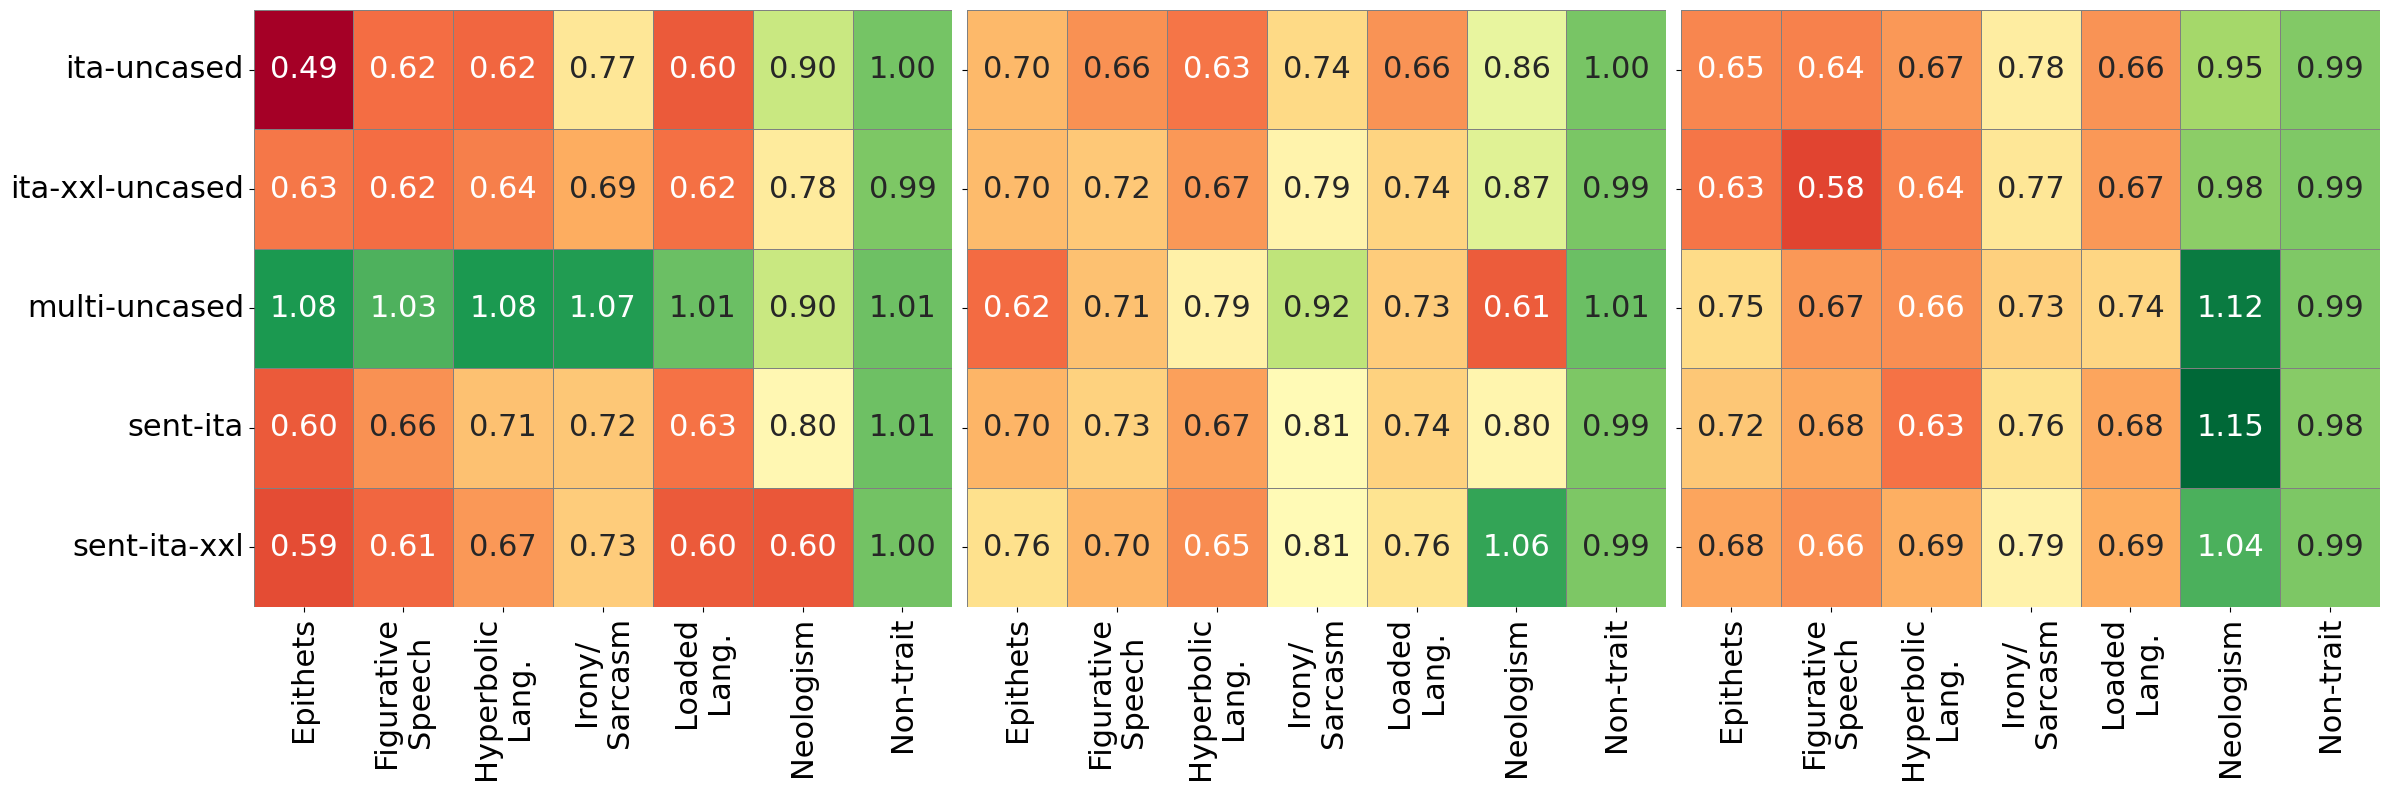

✅ Heatmap comparison created successfully!
Heatmap comparison completed!


In [23]:
def create_heatmap_comparison(ft_data, noft_data, ft_emb_data, ratio_thresholds=[0]):
    """Create three heatmaps (one per variant) showing mean attribution ratios"""
    
    if ft_data[0] is None or noft_data[0] is None or ft_emb_data[0] is None:
        print("Missing data, cannot create plot")
        return None
    
    # Get traits and models
    ft_traits = sorted(ft_data[0]["trait"].unique()) if not ft_data[0].empty else []
    noft_traits = sorted(noft_data[0]["trait"].unique()) if not noft_data[0].empty else []
    ft_emb_traits = sorted(ft_emb_data[0]["trait"].unique()) if not ft_emb_data[0].empty else []
    common_traits = sorted(set(ft_traits) & set(noft_traits) & set(ft_emb_traits))
    
    ft_models = sorted(ft_data[0]["model"].unique()) if not ft_data[0].empty else []
    noft_models = sorted(noft_data[0]["model"].unique()) if not noft_data[0].empty else []
    ft_emb_models = sorted(ft_emb_data[0]["model"].unique()) if not ft_emb_data[0].empty else []
    
    # Normalize model names
    ft_models_normalized = [normalize_model_name(model, 'FT') for model in ft_models]
    noft_models_normalized = [normalize_model_name(model, 'noFT') for model in noft_models]
    ft_emb_models_normalized = [normalize_model_name(model, 'FT_EMB') for model in ft_emb_models]
    
    all_models_normalized = sorted(set(ft_models_normalized + noft_models_normalized + ft_emb_models_normalized))
    
    # Create mapping from normalized to original names
    ft_model_mapping = {norm: orig for orig, norm in zip(ft_models, ft_models_normalized)}
    noft_model_mapping = {norm: orig for orig, norm in zip(noft_models, noft_models_normalized)}
    ft_emb_model_mapping = {norm: orig for orig, norm in zip(ft_emb_models, ft_emb_models_normalized)}
    
    # Prepare combined data
    plot_data = []
    
    # Process all three variants
    variants_data = [
        ('noFT', noft_data, noft_model_mapping),
        ('FT', ft_data, ft_model_mapping),
        ('FT_EMB', ft_emb_data, ft_emb_model_mapping)
    ]
    
    for variant_name, data, mapping in variants_data:
        for trait in common_traits + ['non-trait']:
            for model_norm in all_models_normalized:
                if model_norm not in mapping:
                    continue
                    
                model_orig = mapping[model_norm]
                try:
                    if trait == 'non-trait':
                        mean_ratio = data[1][str(ratio_thresholds[0])][model_orig].get("non_trait", {}).get("mean_ratio", 0)
                    else:
                        mean_ratio = data[1][str(ratio_thresholds[0])][model_orig][trait]["mean_ratio"]
                    
                    plot_data.append({
                        "trait": trait,
                        "model": model_norm,
                        "mean_ratio": mean_ratio,
                        "variant": variant_name
                    })
                except KeyError:
                    continue
    
    df_plot = pd.DataFrame(plot_data)
    
    if df_plot.empty:
        print("No data available after processing")
        return None
    
    # Create figure with three subplots (one per variant)
    fig, axes = plt.subplots(1, 3, figsize=(24, 8))
    
    # Define variants in order
    variants = ['noFT', 'FT', 'FT_EMB']
    variant_titles = ['Linear-probing', 'FT', 'FT+EMB']
    
    # Find global min/max for consistent color scale
    vmin = df_plot['mean_ratio'].min()
    vmax = df_plot['mean_ratio'].max()
    
    # Create heatmap for each variant
    for idx, (variant_name, variant_title, ax) in enumerate(zip(variants, variant_titles, axes)):
        # Filter data for this variant
        variant_data = df_plot[df_plot['variant'] == variant_name].copy()
        
        # Create display names for traits
        variant_data['trait_display'] = variant_data['trait'].map(
            lambda x: feature_name_mapping.get(x, x)
        )
        
        # Pivot data: models as rows, traits as columns
        pivot_matrix = variant_data.pivot_table(
            index='model',
            columns='trait_display',
            values='mean_ratio',
            aggfunc='mean'
        )
        
        if pivot_matrix.empty:
            ax.text(0.5, 0.5, f'No data for {variant_title}', 
                    ha='center', va='center', transform=ax.transAxes)
            continue
        
        # Reorder columns to match feature_name_mapping order
        trait_order = [feature_name_mapping.get(t, t) for t in (common_traits + ['non-trait'])]
        trait_order = [t for t in trait_order if t in pivot_matrix.columns]
        pivot_matrix = pivot_matrix[trait_order]
        
        # Only show colorbar on the rightmost subplot
        cbar = (idx == len(variants) - 1)
        
        # Create heatmap
        sns.heatmap(pivot_matrix, 
                    annot=True, 
                    fmt='.2f',
                    cmap='RdYlGn',  # Red-Yellow-Green colormap (low to high)
                    vmin=vmin,
                    vmax=vmax,
                    cbar=False,
                    cbar_kws={'label': 'Mean Attribution Ratio', 'shrink': 0.8} if cbar else None,
                    linewidths=0.5,
                    linecolor='gray',
                    square=False,
                    ax=ax,
                    annot_kws={'size': 22})
        
        # Set title
        #ax.set_title(variant_title, fontsize=22, fontweight='bold', pad=10)
        
        # Set axis labels
        ax.set_xlabel('')
        ax.set_ylabel('')
        
        # Rotate x-axis labels
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', fontsize=22)
        
        # Keep y-axis labels only on the leftmost plot
        if idx > 0:
            ax.set_yticklabels([])
        else:
            ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=22)
    
    # Add overall title
    #plt.suptitle('Mean Attribution Ratios: Models × Linguistic Traits × Variants', fontsize=16, fontweight='bold', y=0.98)
    
    plt.tight_layout()
    plt.savefig(os.path.join(comparison_dir, 'heatmap_comparison_3way.png'), 
                bbox_inches='tight', dpi=300)
    plt.show()
    
    print("✅ Heatmap comparison created successfully!")
    
    # Save data
    df_plot['trait_display'] = df_plot['trait'].map(feature_name_mapping)
    df_plot.to_csv(os.path.join(comparison_dir, 'heatmap_comparison_data.csv'), index=False)
    
    return df_plot


# Add this to your main execution section (replace the create_comparison_plot call):
if ft_data[0] is not None and noft_data[0] is not None and ft_emb_data[0] is not None:
    print("Creating heatmap comparison...")
    comparison_results = create_heatmap_comparison(ft_data, noft_data, ft_emb_data)
    if comparison_results is not None:
        print("Heatmap comparison completed!")
    else:
        print("Heatmap comparison failed - check the output above for details.")
else:
    print("Could not load data from one or more directories.")

Creating heatmap comparison...


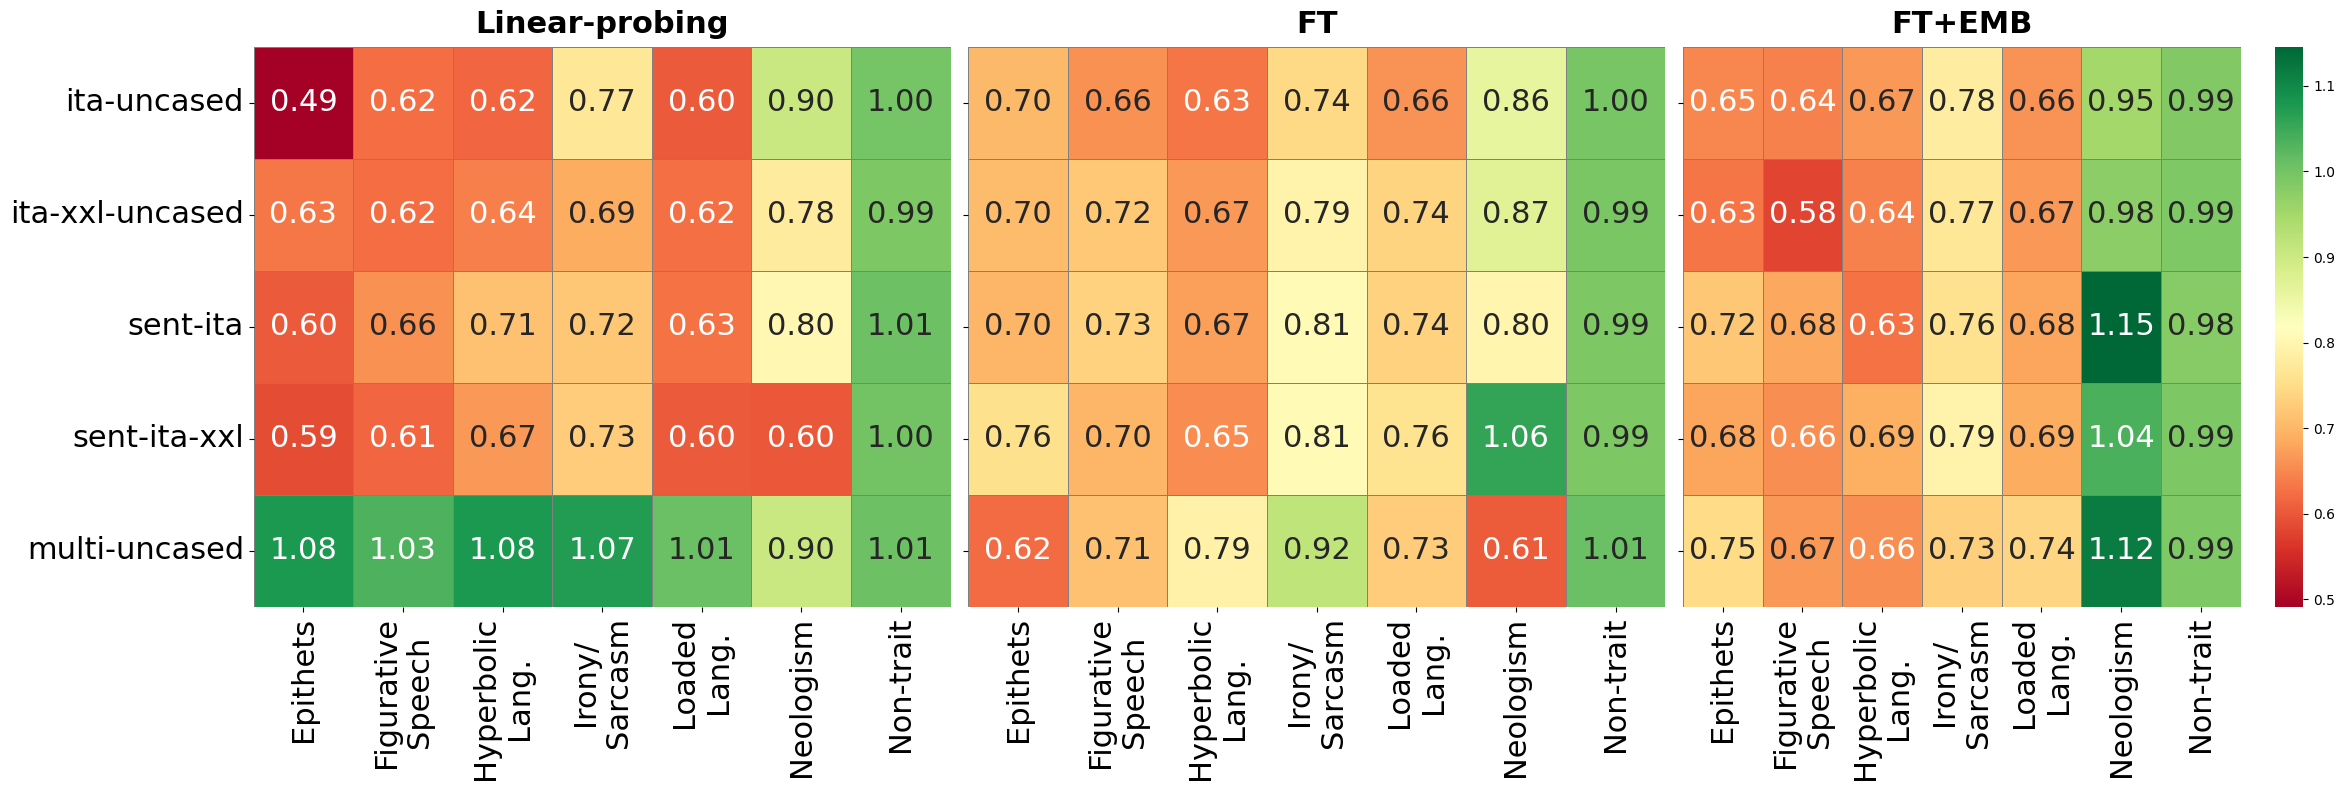

✅ Heatmap comparison created successfully!
Heatmap comparison completed!


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

def create_heatmap_comparison(ft_data, noft_data, ft_emb_data, ratio_thresholds=[0]):
    """Create three heatmaps (one per variant) showing mean attribution ratios"""
    
    if ft_data[0] is None or noft_data[0] is None or ft_emb_data[0] is None:
        print("Missing data, cannot create plot")
        return None
    
    # Get traits and models
    ft_traits = sorted(ft_data[0]["trait"].unique()) if not ft_data[0].empty else []
    noft_traits = sorted(noft_data[0]["trait"].unique()) if not noft_data[0].empty else []
    ft_emb_traits = sorted(ft_emb_data[0]["trait"].unique()) if not ft_emb_data[0].empty else []
    common_traits = sorted(set(ft_traits) & set(noft_traits) & set(ft_emb_traits))
    
    ft_models = sorted(ft_data[0]["model"].unique()) if not ft_data[0].empty else []
    noft_models = sorted(noft_data[0]["model"].unique()) if not noft_data[0].empty else []
    ft_emb_models = sorted(ft_emb_data[0]["model"].unique()) if not ft_emb_data[0].empty else []
    
    # Normalize model names
    ft_models_normalized = [normalize_model_name(model, 'FT') for model in ft_models]
    noft_models_normalized = [normalize_model_name(model, 'noFT') for model in noft_models]
    ft_emb_models_normalized = [normalize_model_name(model, 'FT_EMB') for model in ft_emb_models]
    
    all_models_normalized = sorted(set(ft_models_normalized + noft_models_normalized + ft_emb_models_normalized))
    
    # Create mapping from normalized to original names
    ft_model_mapping = {norm: orig for orig, norm in zip(ft_models, ft_models_normalized)}
    noft_model_mapping = {norm: orig for orig, norm in zip(noft_models, noft_models_normalized)}
    ft_emb_model_mapping = {norm: orig for orig, norm in zip(ft_emb_models, ft_emb_models_normalized)}
    
    # Define desired model order
    desired_model_order = [
        'ita-uncased',
        'ita-xxl-uncased',
        'sent-ita',
        'sent-ita-xxl',
        'multi-uncased'
    ]
    
    # Prepare combined data
    plot_data = []
    
    # Process all three variants
    variants_data = [
        ('noFT', noft_data, noft_model_mapping),
        ('FT', ft_data, ft_model_mapping),
        ('FT_EMB', ft_emb_data, ft_emb_model_mapping)
    ]
    
    for variant_name, data, mapping in variants_data:
        for trait in common_traits + ['non-trait']:
            for model_norm in all_models_normalized:
                if model_norm not in mapping:
                    continue
                    
                model_orig = mapping[model_norm]
                try:
                    if trait == 'non-trait':
                        mean_ratio = data[1][str(ratio_thresholds[0])][model_orig].get("non_trait", {}).get("mean_ratio", 0)
                    else:
                        mean_ratio = data[1][str(ratio_thresholds[0])][model_orig][trait]["mean_ratio"]
                    
                    plot_data.append({
                        "trait": trait,
                        "model": model_norm,
                        "mean_ratio": mean_ratio,
                        "variant": variant_name
                    })
                except KeyError:
                    continue
    
    df_plot = pd.DataFrame(plot_data)
    
    if df_plot.empty:
        print("No data available after processing")
        return None
    
    # Create figure with three subplots (one per variant)
    fig, axes = plt.subplots(1, 3, figsize=(24, 8))
    
    # Define variants and titles
    variants = ['noFT', 'FT', 'FT_EMB']
    variant_titles = ['Linear-probing', 'FT', 'FT+EMB']
    
    # Find global min/max for consistent color scale
    vmin = df_plot['mean_ratio'].min()
    vmax = df_plot['mean_ratio'].max()
    
    # Create heatmap for each variant
    for idx, (variant_name, variant_title, ax) in enumerate(zip(variants, variant_titles, axes)):
        # Filter data for this variant
        variant_data = df_plot[df_plot['variant'] == variant_name].copy()
        
        # Create display names for traits
        variant_data['trait_display'] = variant_data['trait'].map(
            lambda x: feature_name_mapping.get(x, x)
        )
        
        # Pivot data: models as rows, traits as columns
        pivot_matrix = variant_data.pivot_table(
            index='model',
            columns='trait_display',
            values='mean_ratio',
            aggfunc='mean'
        )
        
        if pivot_matrix.empty:
            ax.text(0.5, 0.5, f'No data for {variant_title}', 
                    ha='center', va='center', transform=ax.transAxes)
            continue
        
        # Reorder rows to match desired model order
        available_models = [m for m in desired_model_order if m in pivot_matrix.index]
        pivot_matrix = pivot_matrix.reindex(available_models)
        
        # Reorder columns to match feature_name_mapping order
        trait_order = [feature_name_mapping.get(t, t) for t in (common_traits + ['non-trait'])]
        trait_order = [t for t in trait_order if t in pivot_matrix.columns]
        pivot_matrix = pivot_matrix[trait_order]
        
        # Only show colorbar on the rightmost subplot
        cbar = (idx == len(variants) - 1)
        
        # Create heatmap
        sns.heatmap(pivot_matrix, 
                    annot=True, 
                    fmt='.2f',
                    cmap='RdYlGn',  # Red-Yellow-Green colormap (low to high)
                    vmin=vmin,
                    vmax=vmax,
                    cbar=cbar,
                    cbar_kws=None,
                    linewidths=0.5,
                    linecolor='gray',
                    square=False,
                    ax=ax,
                    annot_kws={'size': 22})
        
        # Set title
        ax.set_title(variant_title, fontsize=22, fontweight='bold', pad=10)
        
        # Set axis labels
        ax.set_xlabel('')
        ax.set_ylabel('')
        
        # Rotate x-axis labels
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', fontsize=22)
        
        # Keep y-axis labels only on the leftmost plot
        if idx > 0:
            ax.set_yticklabels([])
        else:
            ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=22)
    
    # Add overall title
    #plt.suptitle('Mean Attribution Ratios: Models × Linguistic Traits × Variants', fontsize=16, fontweight='bold', y=0.98)
    
    plt.tight_layout()
    plt.savefig(os.path.join(comparison_dir, 'heatmap_comparison_3way.png'), 
                bbox_inches='tight', dpi=300)
    plt.show()
    
    print("✅ Heatmap comparison created successfully!")
    
    # Save data
    df_plot['trait_display'] = df_plot['trait'].map(feature_name_mapping)
    df_plot.to_csv(os.path.join(comparison_dir, 'heatmap_comparison_data.csv'), index=False)
    
    return df_plot

# Main execution section
if ft_data[0] is not None and noft_data[0] is not None and ft_emb_data[0] is not None:
    print("Creating heatmap comparison...")
    comparison_results = create_heatmap_comparison(ft_data, noft_data, ft_emb_data)
    if comparison_results is not None:
        print("Heatmap comparison completed!")
    else:
        print("Heatmap comparison failed - check the output above for details.")
else:
    print("Could not load data from one or more directories.")

Loading FT data...
Loaded combined results from /home/michele.maggini/XAI_HIPP/IG/results_FT: 6876 rows
Models in data: ['bert-ita', 'bert-ita-xxl', 'multi', 'sent-ita', 'sent-ita-xxl']
Traits in data: ['Epithet', 'Figurative_Speech', 'Hyperbolic_Language', 'Irony/Sarcasm', 'Loaded_language', 'Neologism']
Threshold results loaded as <class 'dict'> for /home/michele.maggini/XAI_HIPP/IG/results_FT
Loaded threshold results from /home/michele.maggini/XAI_HIPP/IG/results_FT
Loading noFT data...
Loaded combined results from /home/michele.maggini/XAI_HIPP/IG/results_pretrained: 7060 rows
Models in data: ['dbmdz/bert-base-italian-uncased', 'dbmdz/bert-base-italian-xxl-uncased', 'google-bert/bert-base-multilingual-uncased', 'nickprock/sentence-bert-base-italian-uncased', 'nickprock/sentence-bert-base-italian-xxl-uncased']
Traits in data: ['Epithet', 'Figurative_Speech', 'Hyperbolic_Language', 'Irony/Sarcasm', 'Loaded_language', 'Neologism']
Threshold results loaded as <class 'dict'> for /home/m

NameError: name 'comparison_dir' is not defined

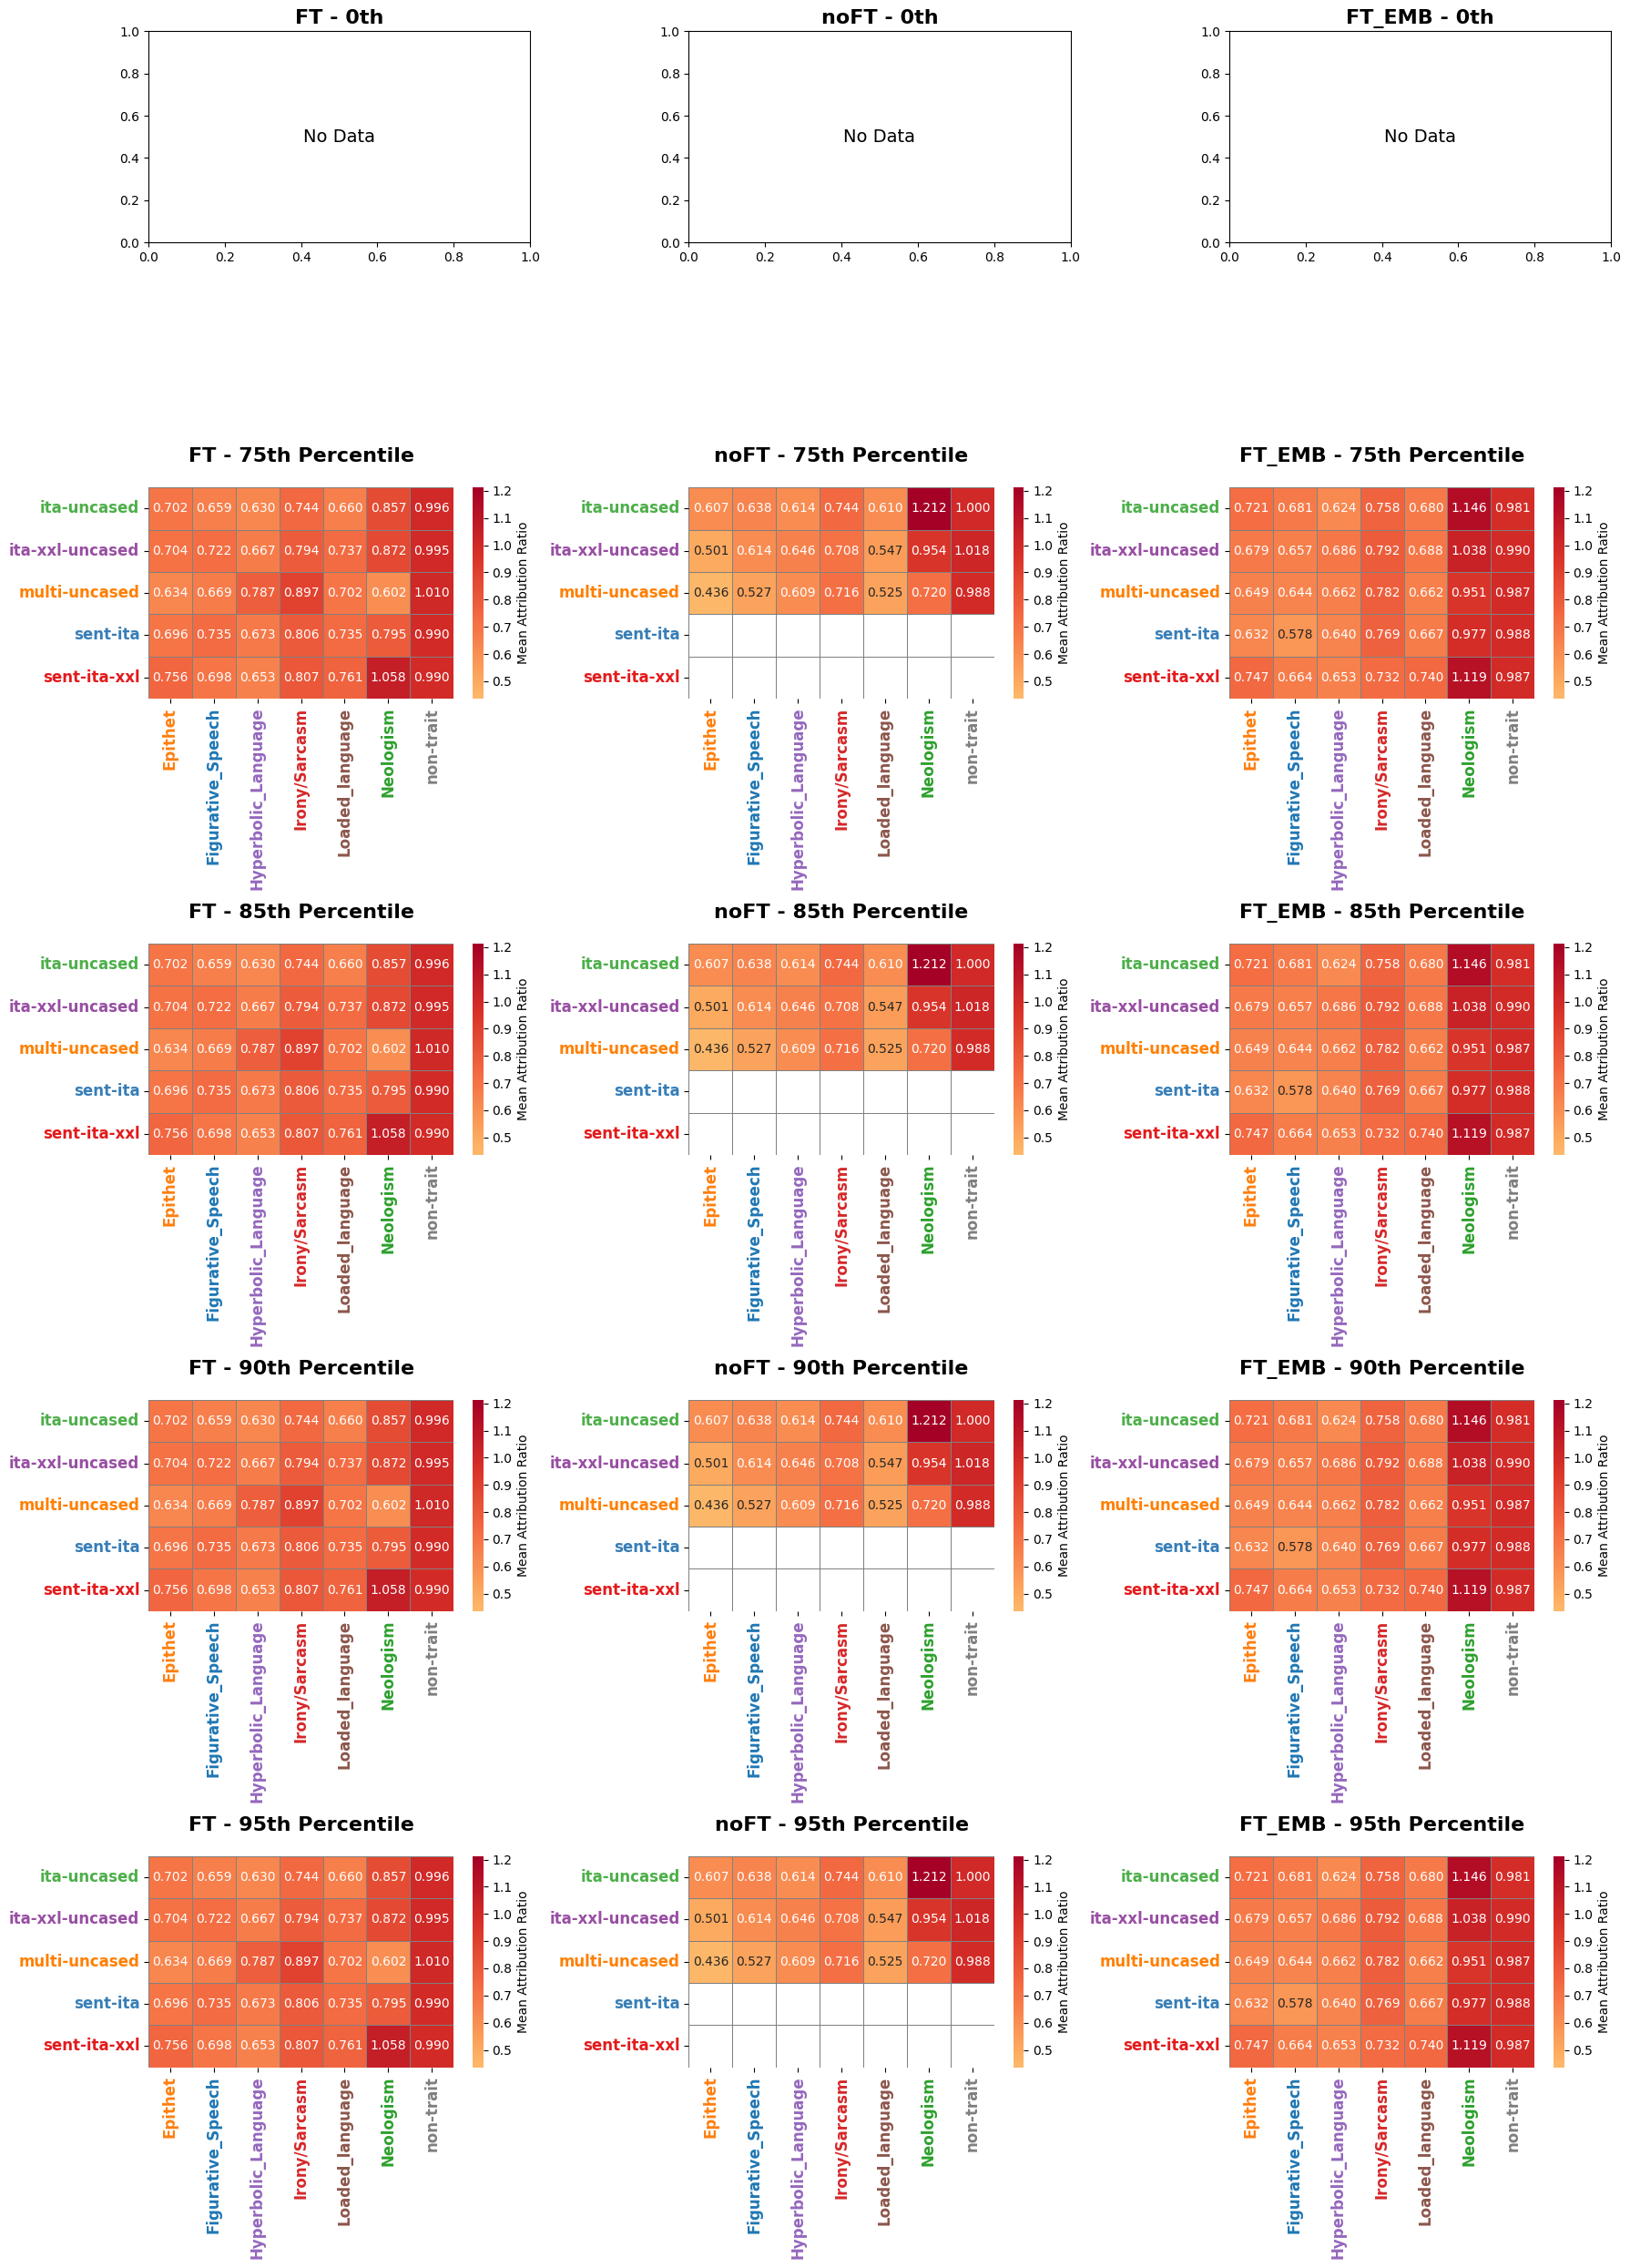

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch, Rectangle
import json
from collections import defaultdict


# Define custom model colors (using normalized names as keys)
model_color_map = {
    'sent-ita-xxl': '#e41a1c',      # Red
    'sent-ita': '#377eb8',          # Blue
    'ita-uncased': '#4daf4a',       # Green
    'ita-xxl-uncased': '#984ea3',   # Purple
    'multi-uncased': '#ff7f00',     # Orange
}

# Define trait colors (consistent with previous plot)
trait_colors = {
    'Figurative_Speech': '#1f77b4',          # Blue
    'Epithet': '#ff7f0e',                    # Orange  
    'Neologism': '#2ca02c',                  # Green
    'Irony/Sarcasm': '#d62728',              # Red
    'Hyperbolic_Language': '#9467bd',        # Purple
    'Loaded_language': '#8c564b',            # Brown
    'non-trait': '#7f7f7f'                   # Gray for non-trait
}

# Feature name mapping for display
feature_name_mapping = {
    'Figurative_Speech': 'Figurative\nSpeech',
    'Epithet': 'Epithets',
    'Neologism': 'Neologism',
    'Irony/Sarcasm': 'Irony/\nSarcasm',
    'Hyperbolic_Language': 'Hyperbolic\nLang.',
    'Loaded_language': 'Loaded\nLang.',
    'non-trait': 'Non-trait'
}

# Percentile thresholds to analyze
PERCENTILE_THRESHOLDS = [0, 75, 85, 90, 95]

def load_and_process_data(base_dir):
    """Load and process data from a given directory"""
    combined_csv_path = os.path.join(base_dir, "combined_attribution_results.csv")
    threshold_json_path = os.path.join(base_dir, "percentile_results.json")
    
    if not os.path.exists(combined_csv_path):
        print(f"Combined results not found: {combined_csv_path}")
        return None, None
    if not os.path.exists(threshold_json_path):
        print(f"Threshold results not found: {threshold_json_path}")
        return None, None
    
    try:
        # Load combined results
        combined_results = pd.read_csv(combined_csv_path)
        print(f"Loaded combined results from {base_dir}: {len(combined_results)} rows")
        print(f"Models in data: {sorted(combined_results['model'].unique())}")
        print(f"Traits in data: {sorted(combined_results['trait'].unique())}")
        
        # Load threshold results
        with open(threshold_json_path, 'r') as f:
            threshold_results = json.load(f)
        
        models = sorted(combined_results['model'].unique())
        
        # Handle if it's a list (possible generation artifact)
        if isinstance(threshold_results, list):
            print(f"Threshold results loaded as list for {base_dir}, length: {len(threshold_results)}")
            if len(threshold_results) == len(models):
                combined_threshold = {}
                for model, res in zip(models, threshold_results):
                    for perc in res:
                        if perc not in combined_threshold:
                            combined_threshold[perc] = {}
                        combined_threshold[perc][model] = res[perc]
                threshold_results = combined_threshold
            else:
                print(f"Warning: List length {len(threshold_results)} does not match models {len(models)}. Using as is.")
        else:
            print(f"Threshold results loaded as {type(threshold_results)} for {base_dir}")
        
        print(f"Loaded threshold results from {base_dir}")
        
        return combined_results, threshold_results
    except Exception as e:
        print(f"Error loading data from {base_dir}: {e}")
        return None, None
def normalize_model_name(model_name, variant):
    """Normalize model name to consistent unified short form for comparison."""
    model_clean = model_name.lower().replace('-', '').replace('_', '').replace('/', '')
    
    # --- Explicit handling for FT models ---
    if variant == 'FT':
        if model_name == 'bert-ita':
            return 'ita-uncased'
        elif model_name == 'bert-ita-xxl':
            return 'ita-xxl-uncased'
        elif model_name == 'multi':
            return 'multi-uncased'
        elif model_name == 'sent-ita':
            return 'sent-ita'
        elif model_name == 'sent-ita-xxl':
            return 'sent-ita-xxl'
        
    # --- Explicit handling for noFT models (by original name) ---
    if variant == 'noFT':
        if model_name in ['bert-ita', 'bert-base-italian-uncased']:
            return 'ita-uncased'
        elif model_name in ['bert-ita-xxl', 'bert-base-italian-xxl-uncased']:
            return 'ita-xxl-uncased'
        elif model_name in ['multi', 'bert-base-multilingual-cased', 'bert-base-multilingual-uncased']:
            return 'multi-uncased'
        elif model_name in ['sent-ita', 'sentence-bert-base-italian-uncased']:
            return 'sent-ita'
        elif model_name in ['sent-ita-xxl', 'sentence-bert-base-italian-xxl-uncased']:
            return 'sent-ita-xxl'
        
        # Additional pattern matching for noFT
        if 'bertbaseitalianuncased' in model_clean and 'xxl' not in model_clean:
            return 'ita-uncased'
        elif 'bertbaseitalianxxluncased' in model_clean:
            return 'ita-xxl-uncased'
        elif 'bertbasemultilingual' in model_clean:
            return 'multi-uncased'
        elif 'sentencebertbaseitalianuncased' in model_clean and 'xxl' not in model_clean:
            return 'sent-ita'
        elif 'sentencebertbaseitalianxxluncased' in model_clean:
            return 'sent-ita-xxl'

    # --- Explicit handling for FT_EMB models ---
    if variant == 'FT_EMB':
        if model_name == 'arch-bert-ita':
            return 'ita-uncased'
        elif model_name == 'arch-bert-ita-xxl':
            return 'ita-xxl-uncased'
        elif model_name in ['arch-multi', 'arch-multi-reft']:
            return 'multi-uncased'
        elif model_name == 'arch-sent-ita':
            return 'sent-ita'
        elif model_name == 'arch-sent-ita-xxl':
            return 'sent-ita-xxl'
        
        # Additional pattern matching for FT_EMB
        if 'archbertita' in model_clean and 'xxl' not in model_clean:
            return 'ita-uncased'
        elif 'archbertitaxxl' in model_clean:
            return 'ita-xxl-uncased'
        elif 'archmulti' in model_clean:
            return 'multi-uncased'
        elif 'archsentita' in model_clean and 'xxl' not in model_clean:
            return 'sent-ita'
        elif 'archsentitaxxl' in model_clean:
            return 'sent-ita-xxl'
    
    print(f"⚠️ Warning: Could not normalize model name: {model_name} (variant: {variant}) -> {model_clean}")
    return model_name

def create_heatmap_comparison(ft_data, noft_data, ft_emb_data, percentile_thresholds=PERCENTILE_THRESHOLDS):
    """Create grouped heatmaps showing FT, noFT, and FT_EMB variants across different percentiles"""
    
    if ft_data[0] is None or noft_data[0] is None or ft_emb_data[0] is None:
        print("Missing data, cannot create heatmaps")
        return None
    
    # Get traits and models
    ft_traits = sorted(ft_data[0]["trait"].unique()) if not ft_data[0].empty else []
    noft_traits = sorted(noft_data[0]["trait"].unique()) if not noft_data[0].empty else []
    ft_emb_traits = sorted(ft_emb_data[0]["trait"].unique()) if not ft_emb_data[0].empty else []
    common_traits = sorted(set(ft_traits) & set(noft_traits) & set(ft_emb_traits))
    
    ft_models = sorted(ft_data[0]["model"].unique()) if not ft_data[0].empty else []
    noft_models = sorted(noft_data[0]["model"].unique()) if not noft_data[0].empty else []
    ft_emb_models = sorted(ft_emb_data[0]["model"].unique()) if not ft_emb_data[0].empty else []
    
    print(f"FT models (original): {ft_models}")
    print(f"noFT models (original): {noft_models}")
    print(f"FT_EMB models (original): {ft_emb_models}")
    
    # Normalize model names with variant information
    ft_models_normalized = [normalize_model_name(model, 'FT') for model in ft_models]
    noft_models_normalized = [normalize_model_name(model, 'noFT') for model in noft_models]
    ft_emb_models_normalized = [normalize_model_name(model, 'FT_EMB') for model in ft_emb_models]
    
    print(f"FT models (normalized): {ft_models_normalized}")
    print(f"noFT models (normalized): {noft_models_normalized}")
    print(f"FT_EMB models (normalized): {ft_emb_models_normalized}")
    
    # Get all unique normalized models
    all_models_normalized = sorted(set(ft_models_normalized + noft_models_normalized + ft_emb_models_normalized))
    print(f"All normalized models: {all_models_normalized}")
    
    if not all_models_normalized:
        print("No models found after normalization!")
        return None
    
    # Create mapping from normalized to original names for each variant
    ft_model_mapping = {}
    for orig, norm in zip(ft_models, ft_models_normalized):
        ft_model_mapping[norm] = orig
    
    noft_model_mapping = {}
    for orig, norm in zip(noft_models, noft_models_normalized):
        noft_model_mapping[norm] = orig
        
    ft_emb_model_mapping = {}
    for orig, norm in zip(ft_emb_models, ft_emb_models_normalized):
        ft_emb_model_mapping[norm] = orig
    
    # Prepare data for heatmaps - collect mean_ratio values for all percentiles
    heatmap_data = []
    
    for percentile in percentile_thresholds:
        percentile_str = str(percentile)
        
        # FT data
        for trait in common_traits + ['non-trait']:
            for model_norm in all_models_normalized:
                if model_norm not in ft_model_mapping:
                    continue
                    
                model_orig = ft_model_mapping[model_norm]
                try:
                    if trait == 'non-trait':
                        mean_ratio = ft_data[1][percentile_str][model_orig].get("non_trait", {}).get("mean_ratio", 0)
                    else:
                        mean_ratio = ft_data[1][percentile_str][model_orig][trait]["mean_ratio"]
                    
                    heatmap_data.append({
                        "percentile": percentile,
                        "trait": trait,
                        "model": model_norm,
                        "mean_ratio": mean_ratio,
                        "variant": "FT"
                    })
                except KeyError:
                    continue
        
        # noFT data
        for trait in common_traits + ['non-trait']:
            for model_norm in all_models_normalized:
                if model_norm not in noft_model_mapping:
                    continue
                    
                model_orig = noft_model_mapping[model_norm]
                try:
                    if trait == 'non-trait':
                        mean_ratio = noft_data[1][percentile_str][model_orig].get("non_trait", {}).get("mean_ratio", 0)
                    else:
                        mean_ratio = noft_data[1][percentile_str][model_orig][trait]["mean_ratio"]
                    
                    heatmap_data.append({
                        "percentile": percentile,
                        "trait": trait,
                        "model": model_norm,
                        "mean_ratio": mean_ratio,
                        "variant": "noFT"
                    })
                except KeyError:
                    continue
        
        # FT_EMB data
        for trait in common_traits + ['non-trait']:
            for model_norm in all_models_normalized:
                if model_norm not in ft_emb_model_mapping:
                    continue
                    
                model_orig = ft_emb_model_mapping[model_norm]
                try:
                    if trait == 'non-trait':
                        mean_ratio = ft_emb_data[1][percentile_str][model_orig].get("non_trait", {}).get("mean_ratio", 0)
                    else:
                        mean_ratio = ft_emb_data[1][percentile_str][model_orig][trait]["mean_ratio"]
                    
                    heatmap_data.append({
                        "percentile": percentile,
                        "trait": trait,
                        "model": model_norm,
                        "mean_ratio": mean_ratio,
                        "variant": "FT_EMB"
                    })
                except KeyError:
                    continue
    
    # Convert to DataFrame
    df_heatmap = pd.DataFrame(heatmap_data)
    
    if df_heatmap.empty:
        print("No data available for heatmaps")
        return None
    
    print(f"Heatmap data: {len(df_heatmap)} rows")
    
    # Create separate heatmaps for each variant
    variants = ['FT', 'noFT', 'FT_EMB']
    
    # Determine global color scale for consistent comparison
    vmin = df_heatmap['mean_ratio'].min()
    vmax = df_heatmap['mean_ratio'].max()
    
    # Create a figure with subplots for each percentile and variant
    n_percentiles = len(percentile_thresholds)
    n_variants = len(variants)
    
    fig, axes = plt.subplots(n_percentiles, n_variants, figsize=(6*n_variants, 5*n_percentiles))
    
    # If only one percentile, make axes 2D
    if n_percentiles == 1:
        axes = axes.reshape(1, -1)
    
    # Define display order for traits
    trait_display_order = common_traits + ['non-trait']
    trait_display_names = [feature_name_mapping.get(t, t) for t in trait_display_order]
    
    for i, percentile in enumerate(percentile_thresholds):
        for j, variant in enumerate(variants):
            ax = axes[i, j]
            
            # Filter data for this percentile and variant
            variant_data = df_heatmap[
                (df_heatmap['percentile'] == percentile) & 
                (df_heatmap['variant'] == variant)
            ]
            
            if variant_data.empty:
                ax.text(0.5, 0.5, 'No Data', ha='center', va='center', transform=ax.transAxes, fontsize=14)
                ax.set_title(f"{variant} - {percentile}th", fontsize=16, fontweight='bold')
                continue
            
            # Pivot to create heatmap matrix: models x traits
            heatmap_matrix = variant_data.pivot_table(
                index='model', 
                columns='trait', 
                values='mean_ratio',
                aggfunc='first'
            ).reindex(index=all_models_normalized, columns=trait_display_order)
            
            # Create heatmap
            sns.heatmap(
                heatmap_matrix,
                ax=ax,
                cmap='RdYlBu_r',  # Red for high, Blue for low
                center=0,  # Center colormap at 0
                vmin=vmin,
                vmax=vmax,
                cbar_kws={'label': 'Mean Attribution Ratio'},
                annot=True,  # Show values in cells
                fmt='.3f',   # Format to 3 decimal places
                annot_kws={'size': 10},
                linewidths=0.5,
                linecolor='gray'
            )
            
            # Customize appearance
            ax.set_title(f"{variant} - {percentile}th Percentile", fontsize=16, fontweight='bold', pad=20)
            ax.set_xlabel('')
            ax.set_ylabel('')
            
            # Set x-axis labels with trait colors
            x_labels = trait_display_names
            for idx, label in enumerate(ax.get_xticklabels()):
                trait_name = trait_display_order[idx]
                label.set_color(trait_colors.get(trait_name, '#7f7f7f'))
                label.set_fontweight('bold')
                label.set_fontsize(12)
            
            # Set y-axis labels with model colors
            for idx, label in enumerate(ax.get_yticklabels()):
                model_name = all_models_normalized[idx]
                label.set_color(model_color_map.get(model_name, '#7f7f7f'))
                label.set_fontweight('bold')
                label.set_fontsize(12)
    
    plt.tight_layout()
    plt.savefig(os.path.join(comparison_dir, 'mean_attribution_ratio_heatmaps_by_percentile.png'), 
                bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()
    
    # Also create individual heatmaps for each variant across percentiles
    for variant in variants:
        fig, axes = plt.subplots(1, n_percentiles, figsize=(6*n_percentiles, 6))
        
        # If only one percentile, make axes iterable
        if n_percentiles == 1:
            axes = [axes]
        
        for i, percentile in enumerate(percentile_thresholds):
            ax = axes[i]
            
            # Filter data for this percentile and variant
            variant_data = df_heatmap[
                (df_heatmap['percentile'] == percentile) & 
                (df_heatmap['variant'] == variant)
            ]
            
            if variant_data.empty:
                ax.text(0.5, 0.5, 'No Data', ha='center', va='center', transform=ax.transAxes, fontsize=14)
                ax.set_title(f"{percentile}th Percentile", fontsize=16, fontweight='bold')
                continue
            
            # Pivot to create heatmap matrix
            heatmap_matrix = variant_data.pivot_table(
                index='model', 
                columns='trait', 
                values='mean_ratio',
                aggfunc='first'
            ).reindex(index=all_models_normalized, columns=trait_display_order)
            
            # Create heatmap
            sns.heatmap(
                heatmap_matrix,
                ax=ax,
                cmap='RdYlBu_r',
                center=0,
                vmin=vmin,
                vmax=vmax,
                cbar_kws={'label': 'Mean Attribution Ratio'},
                annot=True,
                fmt='.3f',
                annot_kws={'size': 10},
                linewidths=0.5,
                linecolor='gray'
            )
            
            ax.set_title(f"{percentile}th Percentile", fontsize=16, fontweight='bold', pad=20)
            ax.set_xlabel('')
            ax.set_ylabel('Models' if i == 0 else '')
            
            # Customize labels
            x_labels = trait_display_names
            for idx, label in enumerate(ax.get_xticklabels()):
                trait_name = trait_display_order[idx]
                label.set_color(trait_colors.get(trait_name, '#7f7f7f'))
                label.set_fontweight('bold')
                label.set_fontsize(11)
                label.set_rotation(45)
                label.set_ha('right')
            
            for idx, label in enumerate(ax.get_yticklabels()):
                model_name = all_models_normalized[idx]
                label.set_color(model_color_map.get(model_name, '#7f7f7f'))
                label.set_fontweight('bold')
                label.set_fontsize(11)
        
        plt.suptitle(f"Mean Attribution Ratio - {variant}", fontsize=18, fontweight='bold', y=1.02)
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_dir, f'mean_attribution_ratio_heatmap_{variant}.png'), 
                    bbox_inches='tight', dpi=300)
        plt.show()
        plt.close()
    
    # Save the heatmap data for reference
    df_heatmap['trait_display'] = df_heatmap['trait'].map(feature_name_mapping)
    df_heatmap.to_csv(os.path.join(comparison_dir, 'mean_ratio_heatmap_data_all_percentiles.csv'), index=False)
    
    print("Heatmap comparison plots created successfully!")
    return df_heatmap

# Main execution
print("Loading FT data...")
ft_data = load_and_process_data(base_output_dir_FT)

print("Loading noFT data...")
noft_data = load_and_process_data(base_output_dir_no_FT)

print("Loading FT_EMB data...")
ft_emb_data = load_and_process_data(base_output_dir_FT_EMB_top)

if ft_data[0] is not None and noft_data[0] is not None and ft_emb_data[0] is not None:
    print("Creating heatmap comparison across percentiles...")
    heatmap_results = create_heatmap_comparison(ft_data, noft_data, ft_emb_data, PERCENTILE_THRESHOLDS)
    if heatmap_results is not None:
        print("Heatmap comparison analysis completed!")
        print("\nData summary by percentile and variant:")
        summary = heatmap_results.groupby(['percentile', 'variant'])['mean_ratio'].agg(['mean', 'std', 'min', 'max'])
        print(summary)
    else:
        print("Heatmap comparison analysis failed - check the output above for details.")
else:
    print("Could not load data from one or more directories.")

Loading FT data...
Loaded combined results from /home/michele.maggini/CT_3results_FT_newThresholds: 6809 rows
Models in data: ['bert-ita', 'bert-ita-xxl', 'multi', 'sent-ita', 'sent-ita-xxl']
Traits in data: ['Epithet', 'Figurative_Speech', 'Hyperbolic_Language', 'Irony/Sarcasm', 'Loaded_language', 'Neologism']
Loaded threshold results from /home/michele.maggini/CT_3results_FT_newThresholds
Loading noFT data...
Loaded combined results from /home/michele.maggini/CT_3results_pretrained_newThresholds: 7060 rows
Models in data: ['bert-base-italian-uncased', 'bert-base-italian-xxl-uncased', 'bert-base-multilingual-cased', 'sentence-bert-base-italian-uncased', 'sentence-bert-base-italian-xxl-uncased']
Traits in data: ['Epithet', 'Figurative_Speech', 'Hyperbolic_Language', 'Irony/Sarcasm', 'Loaded_language', 'Neologism']
Loaded threshold results from /home/michele.maggini/CT_3results_pretrained_newThresholds
Loading FT_EMB data...
Loaded combined results from /home/michele.maggini/CT_3results

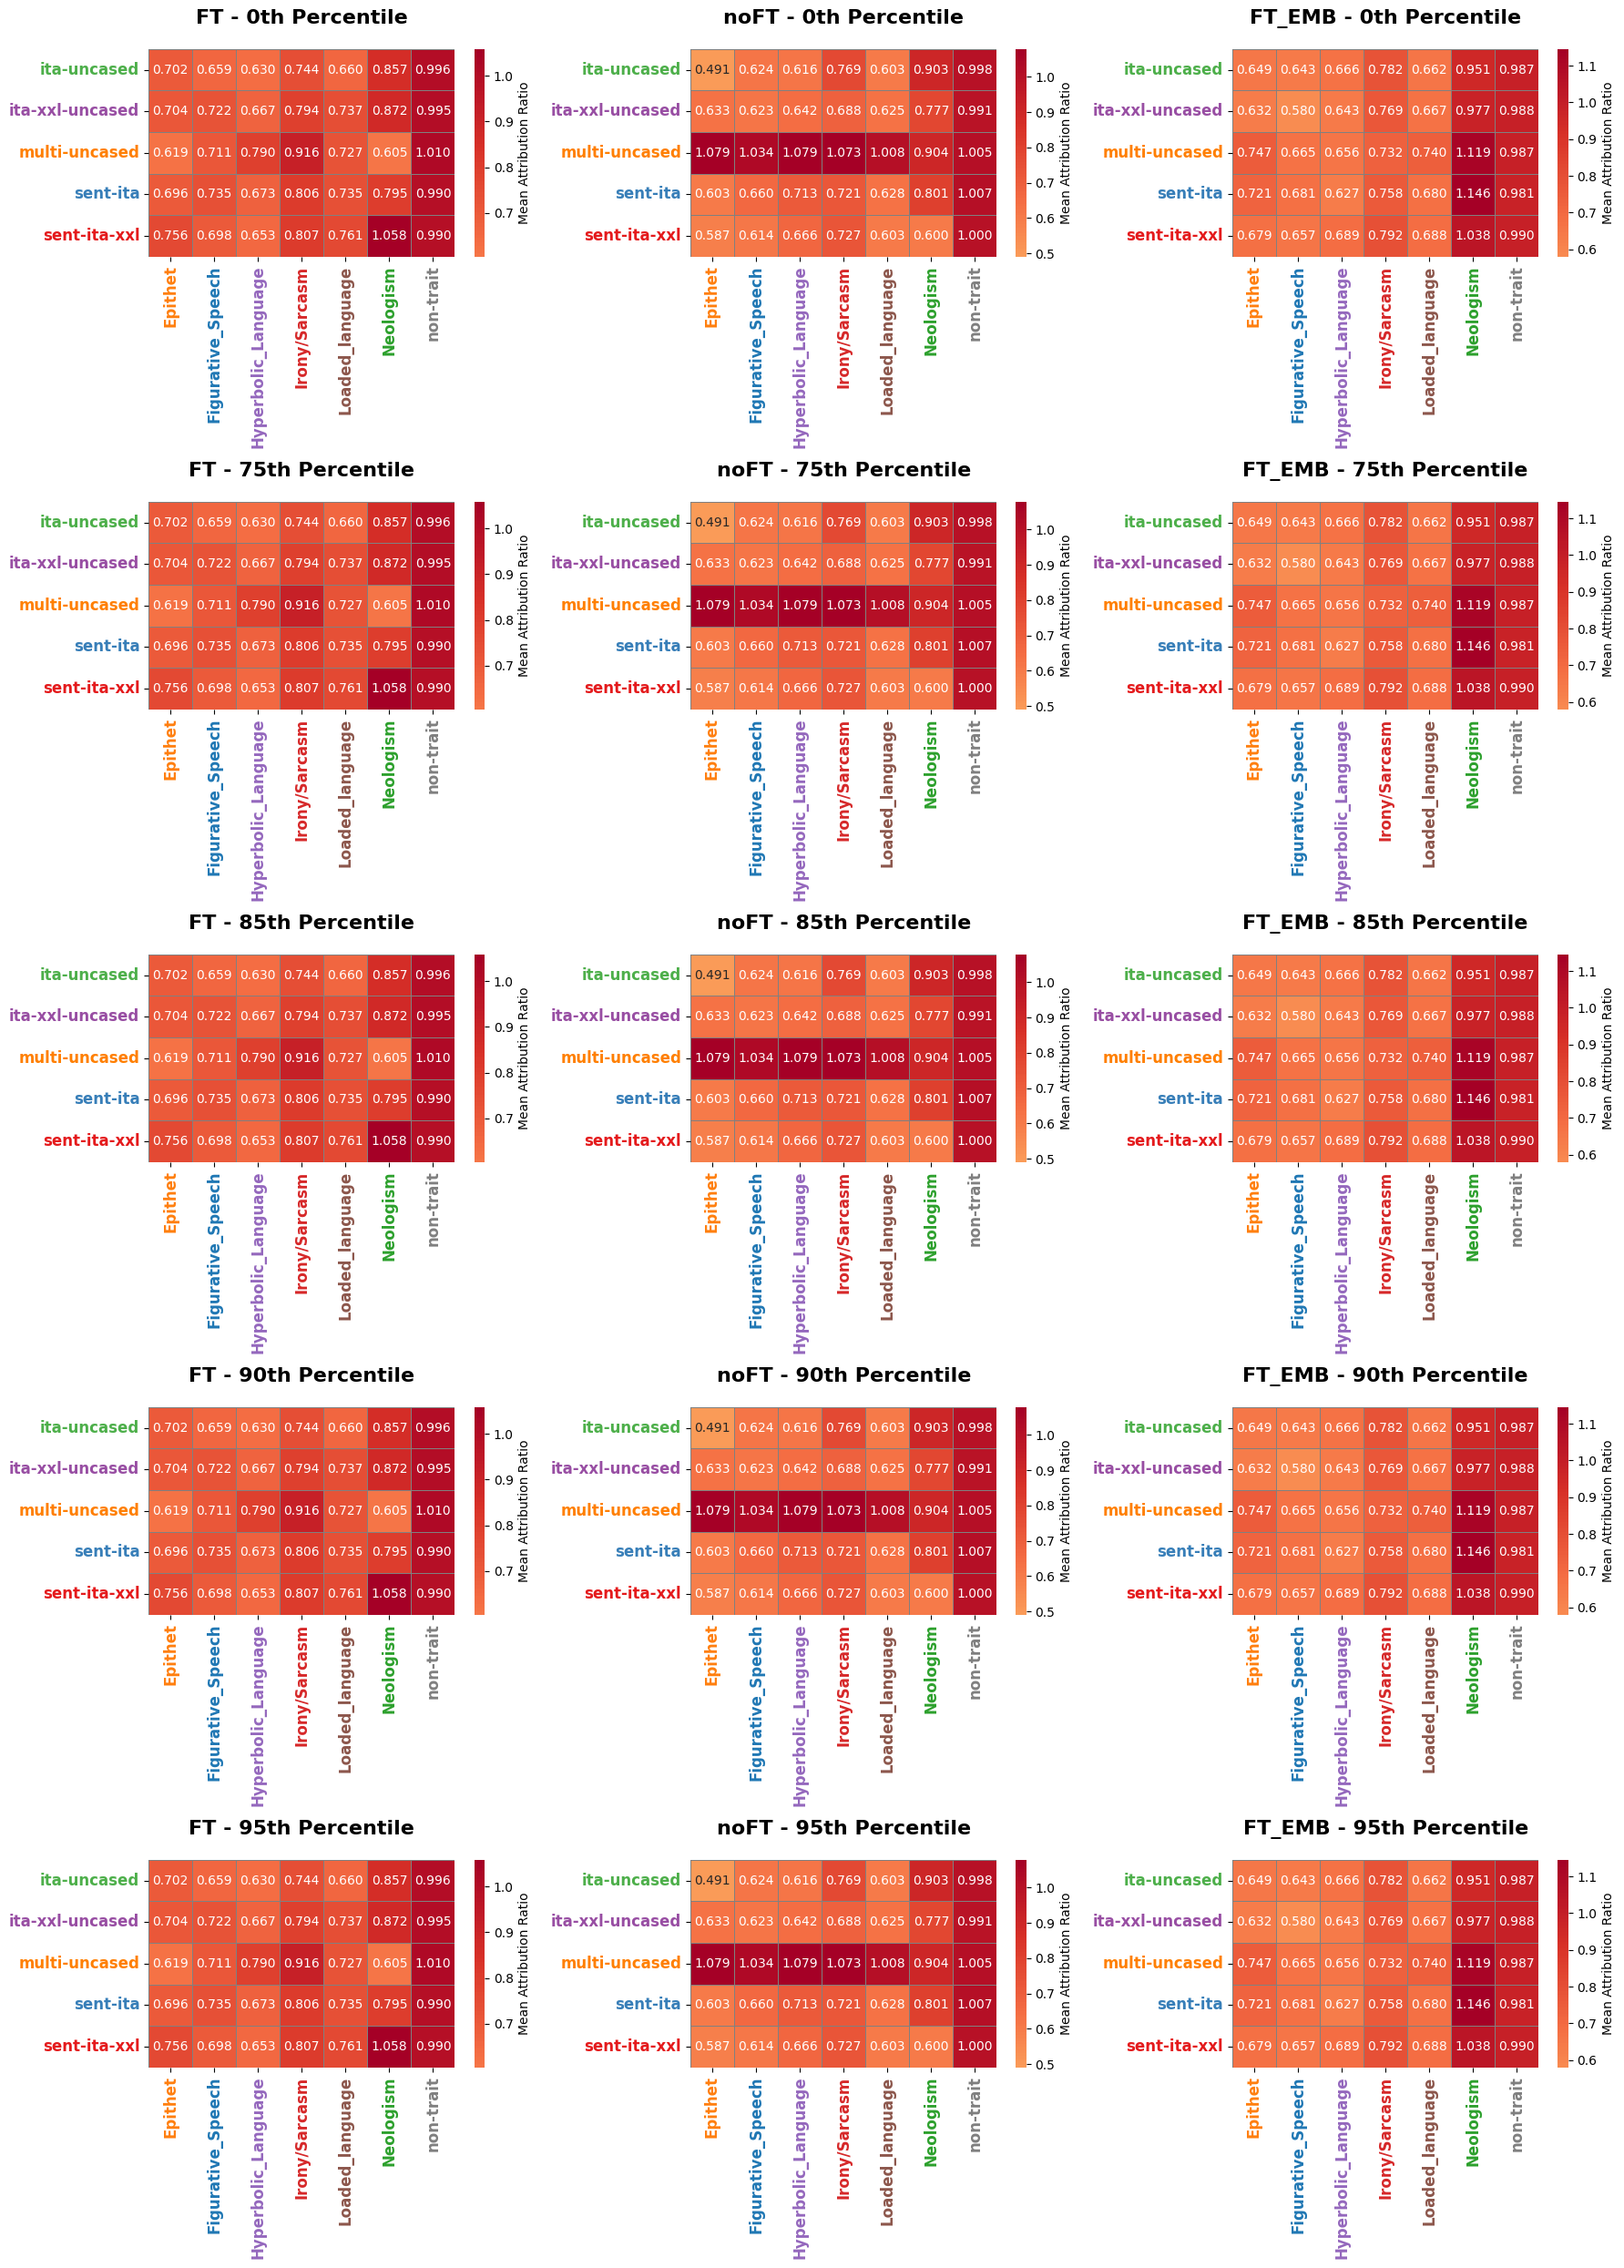

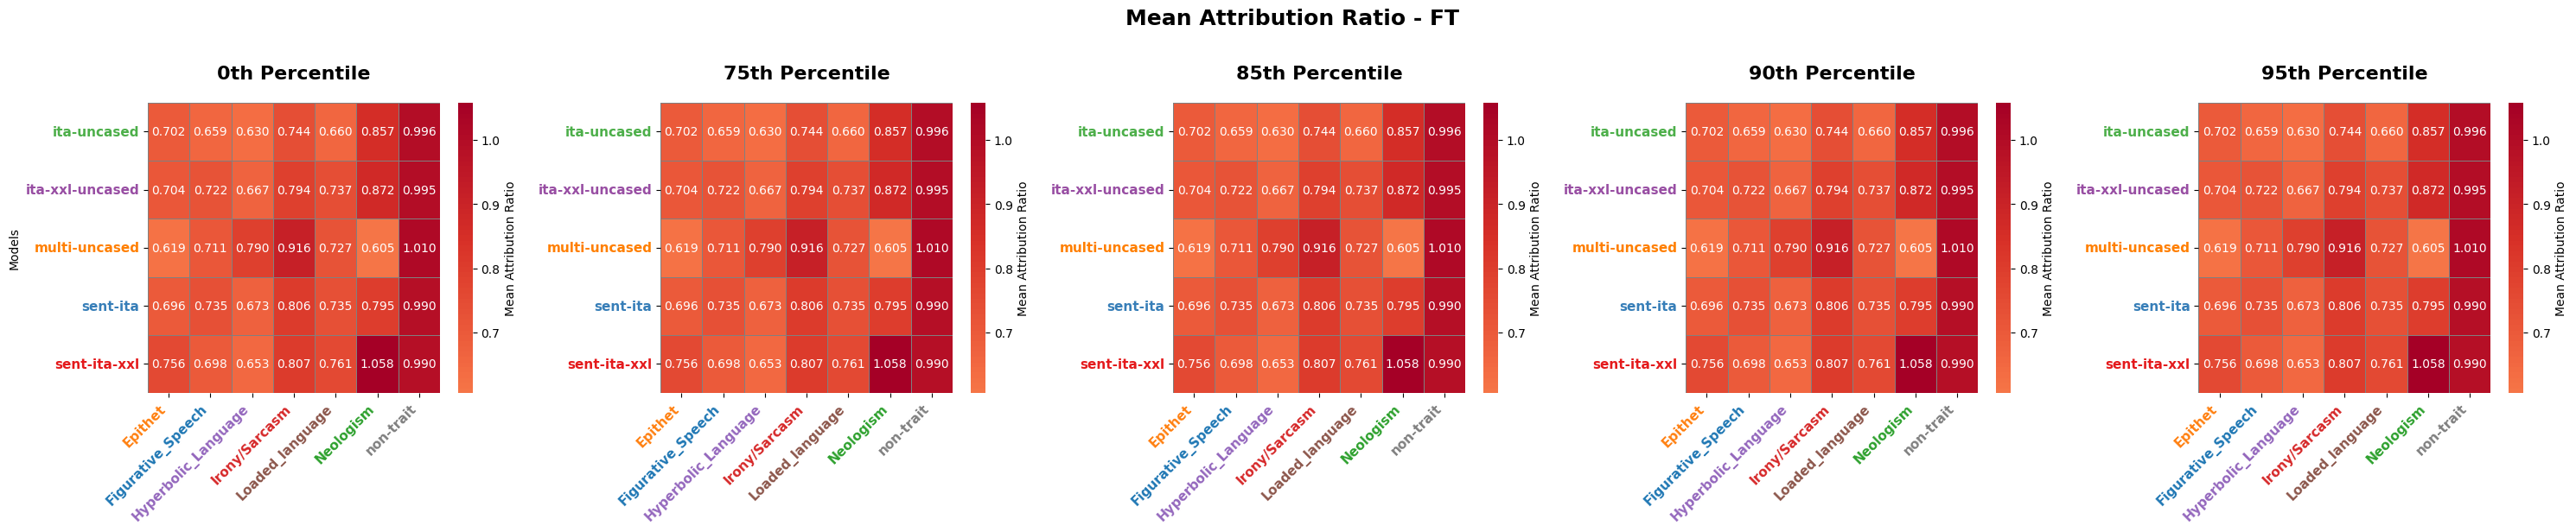

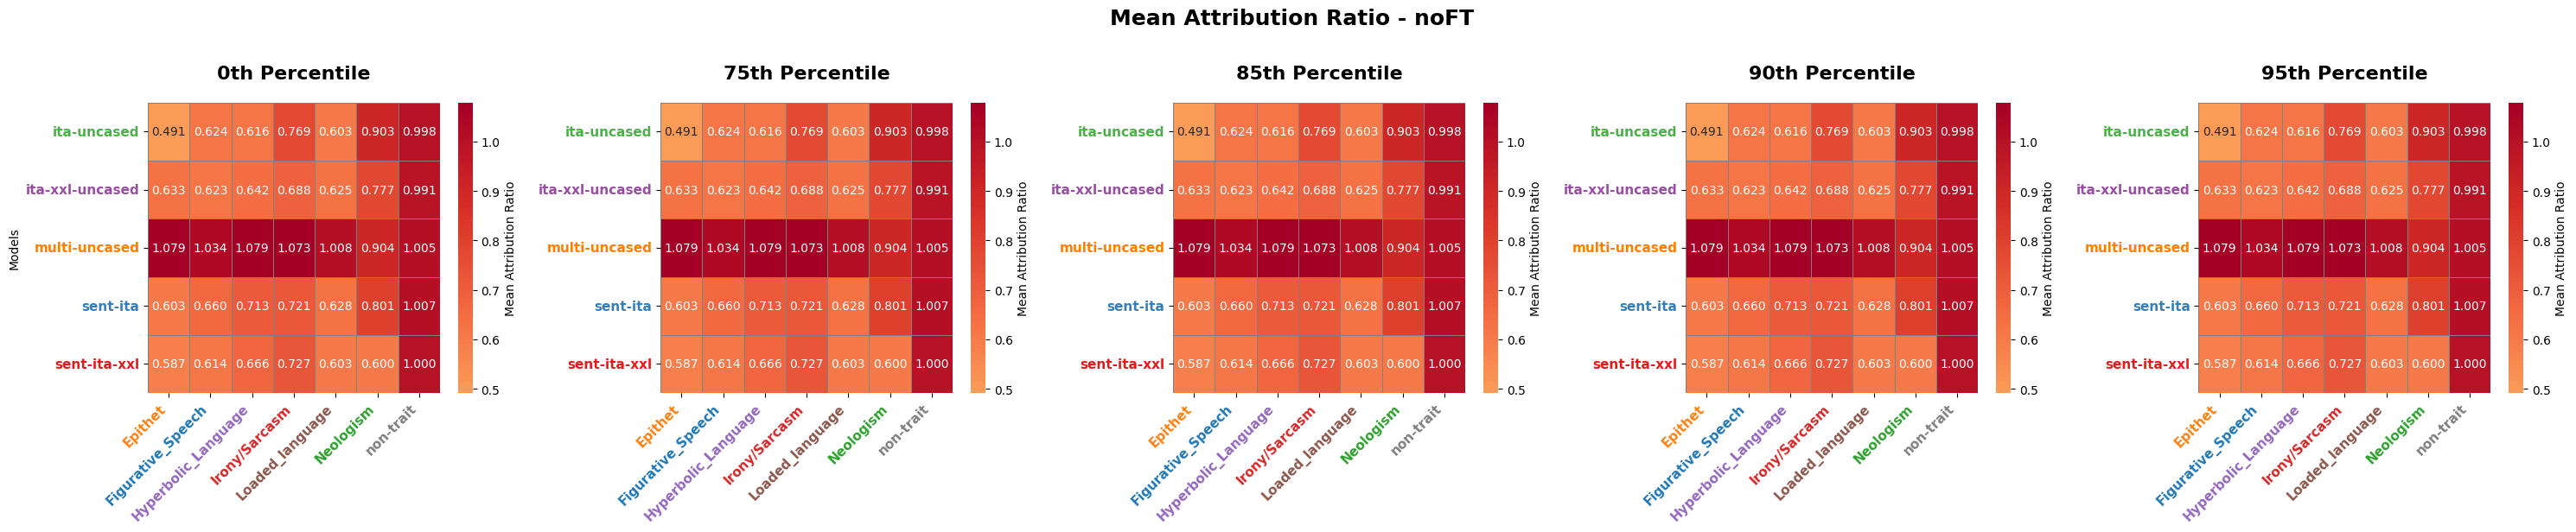

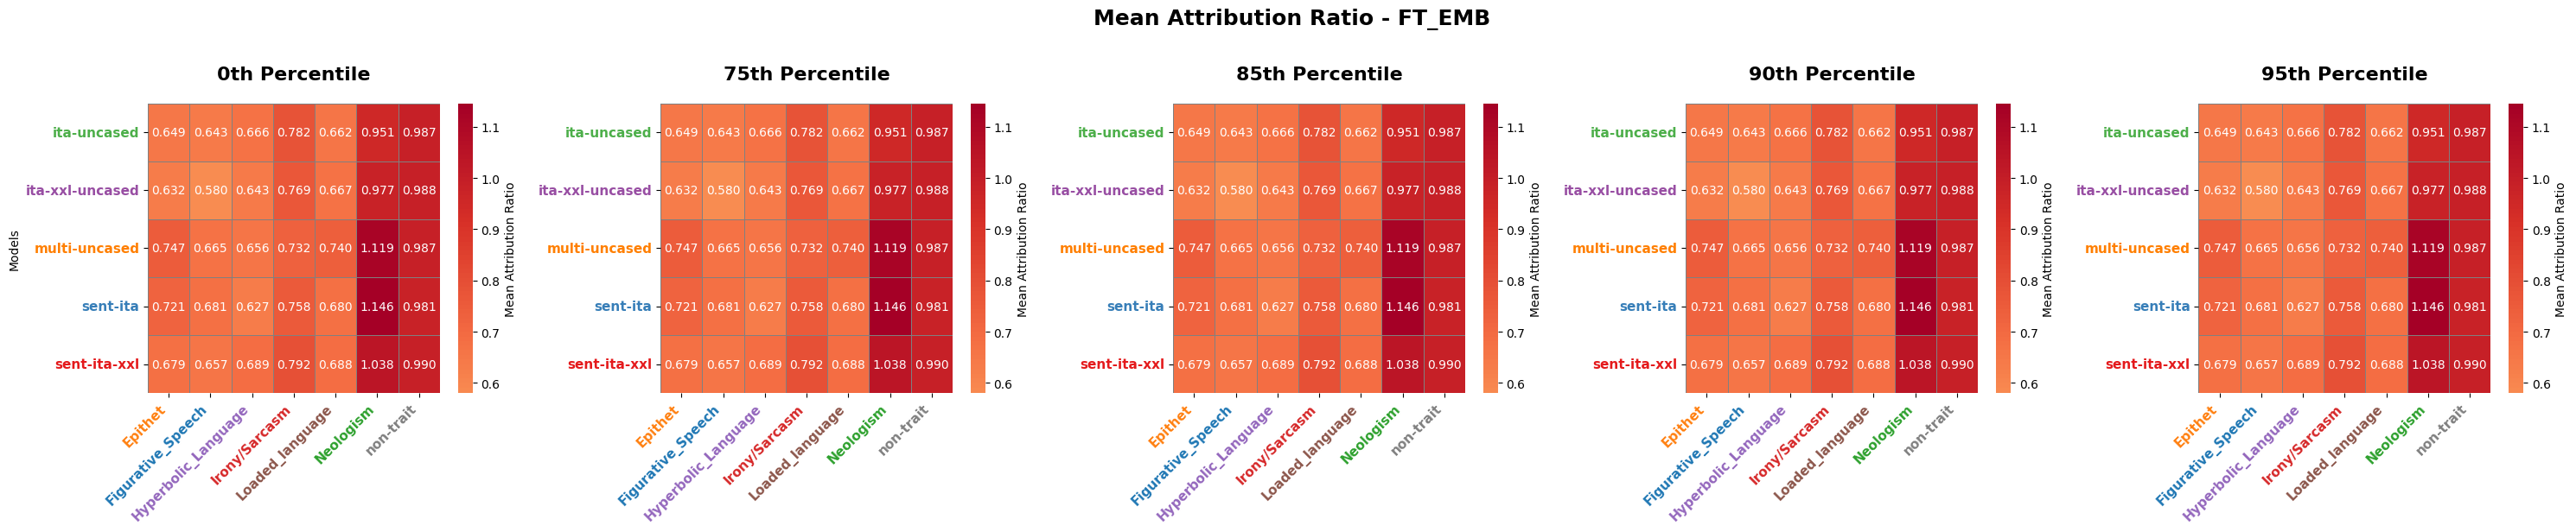

Heatmap comparison plots created successfully!
Heatmap comparison analysis completed!

Data summary by percentile and variant:
                        mean       std       min       max
percentile variant                                        
0          FT       0.779167  0.125873  0.605267  1.058203
           FT_EMB   0.781883  0.160519  0.580085  1.145621
           noFT     0.774119  0.183046  0.491166  1.078974
75         FT       0.779167  0.125873  0.605267  1.058203
           FT_EMB   0.781883  0.160519  0.580085  1.145621
           noFT     0.774119  0.183046  0.491166  1.078974
85         FT       0.779167  0.125873  0.605267  1.058203
           FT_EMB   0.781883  0.160519  0.580085  1.145621
           noFT     0.774119  0.183046  0.491166  1.078974
90         FT       0.779167  0.125873  0.605267  1.058203
           FT_EMB   0.781883  0.160519  0.580085  1.145621
           noFT     0.774119  0.183046  0.491166  1.078974
95         FT       0.779167  0.125873  0.60526

In [33]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch, Rectangle
import json
from collections import defaultdict

# Define custom model colors (using normalized names as keys)
model_color_map = {
    'sent-ita-xxl': '#e41a1c',      # Red
    'sent-ita': '#377eb8',          # Blue
    'ita-uncased': '#4daf4a',       # Green
    'ita-xxl-uncased': '#984ea3',   # Purple
    'multi-uncased': '#ff7f00',     # Orange
}

# Define trait colors (consistent with previous plot)
trait_colors = {
    'Figurative_Speech': '#1f77b4',          # Blue
    'Epithet': '#ff7f0e',                    # Orange  
    'Neologism': '#2ca02c',                  # Green
    'Irony/Sarcasm': '#d62728',              # Red
    'Hyperbolic_Language': '#9467bd',        # Purple
    'Loaded_language': '#8c564b',            # Brown
    'non-trait': '#7f7f7f'                   # Gray for non-trait
}

# Feature name mapping for display
feature_name_mapping = {
    'Figurative_Speech': 'Figurative\nSpeech',
    'Epithet': 'Epithets',
    'Neologism': 'Neologism',
    'Irony/Sarcasm': 'Irony/\nSarcasm',
    'Hyperbolic_Language': 'Hyperbolic\nLang.',
    'Loaded_language': 'Loaded\nLang.',
    'non-trait': 'Non-trait'
}

# Percentile thresholds to analyze
PERCENTILE_THRESHOLDS = [0, 75, 85, 90, 95]

def load_and_process_data(base_dir):
    """Load and process data from a given directory"""
    combined_csv_path = os.path.join(base_dir, "combined_attribution_results.csv")
    threshold_json_path = os.path.join(base_dir, "percentile_results.json")
    
    if not os.path.exists(combined_csv_path):
        print(f"Combined results not found: {combined_csv_path}")
        return None, None
    if not os.path.exists(threshold_json_path):
        print(f"Threshold results not found: {threshold_json_path}")
        return None, None
    
    try:
        # Load combined results
        combined_results = pd.read_csv(combined_csv_path)
        print(f"Loaded combined results from {base_dir}: {len(combined_results)} rows")
        print(f"Models in data: {sorted(combined_results['model'].unique())}")
        print(f"Traits in data: {sorted(combined_results['trait'].unique())}")
        
        # Load threshold results
        with open(threshold_json_path, 'r') as f:
            threshold_results = json.load(f)
        
        models = sorted(combined_results['model'].unique())
        
        # Handle if it's a list (possible generation artifact)
        if isinstance(threshold_results, list):
            print(f"Threshold results loaded as list for {base_dir}, length: {len(threshold_results)}")
            if len(threshold_results) != len(models):
                raise ValueError(f"List length {len(threshold_results)} does not match models {len(models)}")
            combined_threshold = {str(perc): {model: res[str(perc)] for model in models} for perc, res in zip(PERCENTILE_THRESHOLDS, threshold_results)}
            threshold_results = combined_threshold
        else:
            expected_keys = set(str(p) for p in PERCENTILE_THRESHOLDS)
            actual_keys = set(threshold_results.keys())
            if not expected_keys.issubset(actual_keys):
                print(f"Warning: Missing percentiles in {threshold_json_path}. Expected {expected_keys}, got {actual_keys}")
        
        print(f"Loaded threshold results from {base_dir}")
        
        return combined_results, threshold_results
    except Exception as e:
        print(f"Error loading data from {base_dir}: {e}")
        return None, None

def normalize_model_name(model_name, variant):
    """Normalize model name to consistent unified short form for comparison."""
    model_clean = model_name.lower().replace('-', '').replace('_', '').replace('/', '')
    
    # Explicit handling for FT models
    if variant == 'FT':
        if model_name == 'bert-ita':
            return 'ita-uncased'
        elif model_name == 'bert-ita-xxl':
            return 'ita-xxl-uncased'
        elif model_name == 'multi':
            return 'multi-uncased'
        elif model_name == 'sent-ita':
            return 'sent-ita'
        elif model_name == 'sent-ita-xxl':
            return 'sent-ita-xxl'
    
    # Explicit handling for noFT models
    if variant == 'noFT':
        if model_name in ['bert-ita', 'bert-base-italian-uncased']:
            return 'ita-uncased'
        elif model_name in ['bert-ita-xxl', 'bert-base-italian-xxl-uncased']:
            return 'ita-xxl-uncased'
        elif model_name in ['multi', 'bert-base-multilingual-cased', 'bert-base-multilingual-uncased']:
            return 'multi-uncased'
        elif model_name in ['sent-ita', 'sentence-bert-base-italian-uncased']:
            return 'sent-ita'
        elif model_name in ['sent-ita-xxl', 'sentence-bert-base-italian-xxl-uncased']:
            return 'sent-ita-xxl'
    
    # Explicit handling for FT_EMB models
    if variant == 'FT_EMB':
        if model_name == 'arch-bert-ita':
            return 'ita-uncased'
        elif model_name == 'arch-bert-ita-xxl':
            return 'ita-xxl-uncased'
        elif model_name in ['arch-multi', 'arch-multi-reft']:
            return 'multi-uncased'
        elif model_name == 'arch-sent-ita':
            return 'sent-ita'
        elif model_name == 'arch-sent-ita-xxl':
            return 'sent-ita-xxl'
    
    if not any(pattern in model_clean for pattern in ['ita', 'multi', 'sent']):
        print(f"Warning: Unrecognized model {model_name}, using as-is")
        return model_name
    return model_name

def create_heatmap_comparison(ft_data, noft_data, ft_emb_data, percentile_thresholds=PERCENTILE_THRESHOLDS):
    """Create grouped heatmaps showing FT, noFT, and FT_EMB variants across different percentiles"""
    
    if ft_data[0] is None or noft_data[0] is None or ft_emb_data[0] is None:
        print("Missing data, cannot create heatmaps")
        return None
    
    # Get traits and models
    ft_traits = sorted(ft_data[0]["trait"].unique()) if not ft_data[0].empty else []
    noft_traits = sorted(noft_data[0]["trait"].unique()) if not noft_data[0].empty else []
    ft_emb_traits = sorted(ft_emb_data[0]["trait"].unique()) if not ft_emb_data[0].empty else []
    common_traits = sorted(set(ft_traits) & set(noft_traits) & set(ft_emb_traits))
    
    ft_models = sorted(ft_data[0]["model"].unique()) if not ft_data[0].empty else []
    noft_models = sorted(noft_data[0]["model"].unique()) if not noft_data[0].empty else []
    ft_emb_models = sorted(ft_emb_data[0]["model"].unique()) if not ft_emb_data[0].empty else []
    
    print(f"FT models (original): {ft_models}")
    print(f"noFT models (original): {noft_models}")
    print(f"FT_EMB models (original): {ft_emb_models}")
    
    # Normalize model names with variant information
    ft_models_normalized = [normalize_model_name(model, 'FT') for model in ft_models]
    noft_models_normalized = [normalize_model_name(model, 'noFT') for model in noft_models]
    ft_emb_models_normalized = [normalize_model_name(model, 'FT_EMB') for model in ft_emb_models]
    
    print(f"FT models (normalized): {ft_models_normalized}")
    print(f"noFT models (normalized): {noft_models_normalized}")
    print(f"FT_EMB models (normalized): {ft_emb_models_normalized}")
    
    # Get all unique normalized models
    all_models_normalized = sorted(set(ft_models_normalized + noft_models_normalized + ft_emb_models_normalized))
    print(f"All normalized models: {all_models_normalized}")
    
    if not all_models_normalized:
        print("No models found after normalization!")
        return None
    
    # Create mapping from normalized to original names for each variant
    ft_model_mapping = {norm: orig for orig, norm in zip(ft_models, ft_models_normalized) if norm in all_models_normalized}
    noft_model_mapping = {norm: orig for orig, norm in zip(noft_models, noft_models_normalized) if norm in all_models_normalized}
    ft_emb_model_mapping = {norm: orig for orig, norm in zip(ft_emb_models, ft_emb_models_normalized) if norm in all_models_normalized}
    
    # Prepare data for heatmaps - collect mean_ratio values for all percentiles
    heatmap_data = []
    
    for percentile in percentile_thresholds:
        percentile_str = str(percentile)
        
        # FT data
        for trait in common_traits + ['non-trait']:
            for model_norm in all_models_normalized:
                if model_norm not in ft_model_mapping:
                    continue
                model_orig = ft_model_mapping[model_norm]
                try:
                    if trait == 'non-trait':
                        mean_ratio = ft_data[1][percentile_str][model_orig].get("non_trait", {}).get("mean_ratio", 0)
                    else:
                        mean_ratio = ft_data[1][percentile_str][model_orig][trait]["mean_ratio"]
                    print(f"FT - Percentile: {percentile}, Model: {model_orig}, Trait: {trait}, Mean Ratio: {mean_ratio}")
                    heatmap_data.append({
                        "percentile": percentile,
                        "trait": trait,
                        "model": model_norm,
                        "mean_ratio": mean_ratio,
                        "variant": "FT"
                    })
                except KeyError:
                    print(f"FT - KeyError for percentile {percentile}, model {model_orig}, trait {trait}")
                    continue
        
        # noFT data
        for trait in common_traits + ['non-trait']:
            for model_norm in all_models_normalized:
                if model_norm not in noft_model_mapping:
                    continue
                model_orig = noft_model_mapping[model_norm]
                try:
                    if trait == 'non-trait':
                        mean_ratio = noft_data[1][percentile_str][model_orig].get("non_trait", {}).get("mean_ratio", 0)
                    else:
                        mean_ratio = noft_data[1][percentile_str][model_orig][trait]["mean_ratio"]
                    print(f"noFT - Percentile: {percentile}, Model: {model_orig}, Trait: {trait}, Mean Ratio: {mean_ratio}")
                    heatmap_data.append({
                        "percentile": percentile,
                        "trait": trait,
                        "model": model_norm,
                        "mean_ratio": mean_ratio,
                        "variant": "noFT"
                    })
                except KeyError:
                    print(f"noFT - KeyError for percentile {percentile}, model {model_orig}, trait {trait}")
                    continue
        
        # FT_EMB data
        for trait in common_traits + ['non-trait']:
            for model_norm in all_models_normalized:
                if model_norm not in ft_emb_model_mapping:
                    continue
                model_orig = ft_emb_model_mapping[model_norm]
                try:
                    if trait == 'non-trait':
                        mean_ratio = ft_emb_data[1][percentile_str][model_orig].get("non_trait", {}).get("mean_ratio", 0)
                    else:
                        mean_ratio = ft_emb_data[1][percentile_str][model_orig][trait]["mean_ratio"]
                    print(f"FT_EMB - Percentile: {percentile}, Model: {model_orig}, Trait: {trait}, Mean Ratio: {mean_ratio}")
                    heatmap_data.append({
                        "percentile": percentile,
                        "trait": trait,
                        "model": model_norm,
                        "mean_ratio": mean_ratio,
                        "variant": "FT_EMB"
                    })
                except KeyError:
                    print(f"FT_EMB - KeyError for percentile {percentile}, model {model_orig}, trait {trait}")
                    continue
    
    # Convert to DataFrame
    df_heatmap = pd.DataFrame(heatmap_data)
    
    if df_heatmap.empty:
        print("No data available for heatmaps")
        return None
    
    print(f"Heatmap data: {len(df_heatmap)} rows")
    
    # Check for duplicate entries
    if df_heatmap.duplicated(subset=['model', 'trait', 'percentile']).any():
        print("Warning: Duplicate entries found in heatmap data")
    
    # Create separate heatmaps for each variant
    variants = ['FT', 'noFT', 'FT_EMB']
    
    # Create a figure with subplots for each percentile and variant
    n_percentiles = len(percentile_thresholds)
    n_variants = len(variants)
    
    fig, axes = plt.subplots(n_percentiles, n_variants, figsize=(6*n_variants, 5*n_percentiles))
    
    # If only one percentile, make axes 2D
    if n_percentiles == 1:
        axes = axes.reshape(1, -1)
    
    # Define display order for traits
    trait_display_order = common_traits + ['non-trait']
    trait_display_names = [feature_name_mapping.get(t, t) for t in trait_display_order]
    
    for i, percentile in enumerate(percentile_thresholds):
        for j, variant in enumerate(variants):
            ax = axes[i, j]
            
            # Filter data for this percentile and variant
            variant_data = df_heatmap[
                (df_heatmap['percentile'] == percentile) & 
                (df_heatmap['variant'] == variant)
            ]
            
            if variant_data.empty:
                ax.text(0.5, 0.5, 'No Data', ha='center', va='center', transform=ax.transAxes, fontsize=14)
                ax.set_title(f"{variant} - {percentile}th", fontsize=16, fontweight='bold')
                continue
            
            # Pivot to create heatmap matrix: models x traits
            heatmap_matrix = variant_data.pivot_table(
                index='model', 
                columns='trait', 
                values='mean_ratio',
                aggfunc='mean'  # Use mean to aggregate multiple values
            ).reindex(index=all_models_normalized, columns=trait_display_order)
            
            # Compute local vmin and vmax for this subplot
            vmin = variant_data['mean_ratio'].min()
            vmax = variant_data['mean_ratio'].max()
            
            # Create heatmap
            sns.heatmap(
                heatmap_matrix,
                ax=ax,
                cmap='RdYlBu_r',  # Red for high, Blue for low
                center=0,  # Center colormap at 0
                vmin=vmin,
                vmax=vmax,
                cbar_kws={'label': 'Mean Attribution Ratio'},
                annot=True,  # Show values in cells
                fmt='.3f',   # Format to 3 decimal places
                annot_kws={'size': 10},
                linewidths=0.5,
                linecolor='gray'
            )
            
            # Customize appearance
            ax.set_title(f"{variant} - {percentile}th Percentile", fontsize=16, fontweight='bold', pad=20)
            ax.set_xlabel('')
            ax.set_ylabel('')
            
            # Set x-axis labels with trait colors
            x_labels = trait_display_names
            for idx, label in enumerate(ax.get_xticklabels()):
                trait_name = trait_display_order[idx]
                label.set_color(trait_colors.get(trait_name, '#7f7f7f'))
                label.set_fontweight('bold')
                label.set_fontsize(12)
            
            # Set y-axis labels with model colors
            for idx, label in enumerate(ax.get_yticklabels()):
                model_name = all_models_normalized[idx]
                label.set_color(model_color_map.get(model_name, '#7f7f7f'))
                label.set_fontweight('bold')
                label.set_fontsize(12)
    
    plt.tight_layout()
    plt.savefig(os.path.join(comparison_dir, 'mean_attribution_ratio_heatmaps_by_percentile.png'), 
                bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()
    
    # Also create individual heatmaps for each variant across percentiles
    for variant in variants:
        fig, axes = plt.subplots(1, n_percentiles, figsize=(6*n_percentiles, 6))
        
        # If only one percentile, make axes iterable
        if n_percentiles == 1:
            axes = [axes]
        
        for i, percentile in enumerate(percentile_thresholds):
            ax = axes[i]
            
            # Filter data for this percentile and variant
            variant_data = df_heatmap[
                (df_heatmap['percentile'] == percentile) & 
                (df_heatmap['variant'] == variant)
            ]
            
            if variant_data.empty:
                ax.text(0.5, 0.5, 'No Data', ha='center', va='center', transform=ax.transAxes, fontsize=14)
                ax.set_title(f"{percentile}th Percentile", fontsize=16, fontweight='bold')
                continue
            
            # Pivot to create heatmap matrix
            heatmap_matrix = variant_data.pivot_table(
                index='model', 
                columns='trait', 
                values='mean_ratio',
                aggfunc='mean'  # Use mean to aggregate multiple values
            ).reindex(index=all_models_normalized, columns=trait_display_order)
            
            # Compute local vmin and vmax for this subplot
            vmin = variant_data['mean_ratio'].min()
            vmax = variant_data['mean_ratio'].max()
            
            # Create heatmap
            sns.heatmap(
                heatmap_matrix,
                ax=ax,
                cmap='RdYlBu_r',
                center=0,
                vmin=vmin,
                vmax=vmax,
                cbar_kws={'label': 'Mean Attribution Ratio'},
                annot=True,
                fmt='.3f',
                annot_kws={'size': 10},
                linewidths=0.5,
                linecolor='gray'
            )
            
            ax.set_title(f"{percentile}th Percentile", fontsize=16, fontweight='bold', pad=20)
            ax.set_xlabel('')
            ax.set_ylabel('Models' if i == 0 else '')
            
            # Customize labels
            x_labels = trait_display_names
            for idx, label in enumerate(ax.get_xticklabels()):
                trait_name = trait_display_order[idx]
                label.set_color(trait_colors.get(trait_name, '#7f7f7f'))
                label.set_fontweight('bold')
                label.set_fontsize(11)
                label.set_rotation(45)
                label.set_ha('right')
            
            for idx, label in enumerate(ax.get_yticklabels()):
                model_name = all_models_normalized[idx]
                label.set_color(model_color_map.get(model_name, '#7f7f7f'))
                label.set_fontweight('bold')
                label.set_fontsize(11)
        
        plt.suptitle(f"Mean Attribution Ratio - {variant}", fontsize=18, fontweight='bold', y=1.02)
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_dir, f'mean_attribution_ratio_heatmap_{variant}.png'), 
                    bbox_inches='tight', dpi=300)
        plt.show()
        plt.close()
    
    # Save the heatmap data for reference
    df_heatmap['trait_display'] = df_heatmap['trait'].map(feature_name_mapping)
    df_heatmap.to_csv(os.path.join(comparison_dir, 'mean_ratio_heatmap_data_all_percentiles.csv'), index=False)
    
    print("Heatmap comparison plots created successfully!")
    return df_heatmap

# Main execution
print("Loading FT data...")
ft_data = load_and_process_data(base_output_dir_FT)

print("Loading noFT data...")
noft_data = load_and_process_data(base_output_dir_no_FT)

print("Loading FT_EMB data...")
ft_emb_data = load_and_process_data(base_output_dir_FT_EMB_top)

if ft_data[0] is not None and noft_data[0] is not None and ft_emb_data[0] is not None:
    print("Creating heatmap comparison across percentiles...")
    heatmap_results = create_heatmap_comparison(ft_data, noft_data, ft_emb_data, PERCENTILE_THRESHOLDS)
    if heatmap_results is not None:
        print("Heatmap comparison analysis completed!")
        print("\nData summary by percentile and variant:")
        summary = heatmap_results.groupby(['percentile', 'variant'])['mean_ratio'].agg(['mean', 'std', 'min', 'max'])
        print(summary)
        # Check for identical mean ratios across percentiles
        for percentile in PERCENTILE_THRESHOLDS:
            perc_data = heatmap_results[heatmap_results['percentile'] == percentile]
            if perc_data['mean_ratio'].nunique() == 1:
                print(f"Warning: All mean_ratio values are identical for percentile {percentile}")
    else:
        print("Heatmap comparison analysis failed - check the output above for details.")
else:
    print("Could not load data from one or more directories.")